# Model comparisons

In this notebook, we'll take BartPy through its paces using increasingly complex sin wave models.  We'll compare how it performs to two similar models: OLS and catboost.

For the purposes of this exercise, I'm testing out of the box performance.  This makes sense, as part of the value prop of BartPy is it's ability to work well without parameter tuning, but it's possible that the scores of all of the models could be improved with parameter tuning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import catboost 
from catboost import Pool
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from copy import deepcopy

from bartpy.sklearnmodel import SklearnModel

%matplotlib inline

## Set up models

In [2]:
def fit_catboost(X_train, y_train, X_test, y_test):
    eval_cutoff = len(X_train) // 3
    eval_X, eval_y, train_X, train_y = X_train[:eval_cutoff, :], y_train[:eval_cutoff], X_train[eval_cutoff:, :], y_train[eval_cutoff:]
    catboost_model = catboost.CatBoostRegressor()
    catboost_model.fit(Pool(train_X, train_y), eval_set = Pool(eval_X, eval_y), use_best_model=True)
    pred = catboost_model.predict(X_test)
    score = r2_score(y_test, pred)
    return catboost_model, pred, score

def fit_bartpy(X_train, y_train, X_test, y_test):
    model = SklearnModel(n_samples=1000, n_burn=50, n_trees=500, store_in_sample_predictions=False)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    return model, pred, score

def fit_linear_model(X_train, y_train, X_test, y_test):
    rebased_x = np.sin(X_train[:, 0]).reshape(-1, 1)
    linear_model = LinearRegression()
    linear_model.fit(rebased_x, y_train)
    pred = linear_model.predict(np.sin(X_test[:, 0]).reshape(-1, 1))
    score = linear_model.score(np.sin(X_test[:, 0]).reshape(-1, 1), y_test)
    return linear_model, pred, score

kf = KFold(2)

def compare_models(X, y, models_funcs = [fit_bartpy, fit_catboost, fit_linear_model]):
    scores, predictions, trained_models = [], [], []

    for train_index, test_index in kf.split(X):
        trained_models.append([])    
        scores.append([])
        predictions.append([])

        for f in models_funcs:
            model, pred, score = f(X[train_index, :], y[train_index], X[test_index, :], y[test_index])
            trained_models[-1].append(deepcopy(model))
            predictions[-1].append(pred)
            scores[-1].append(score)
    return scores, predictions, trained_models

## One dimensional, single wave

Text(0.5, 1.0, 'X v y')

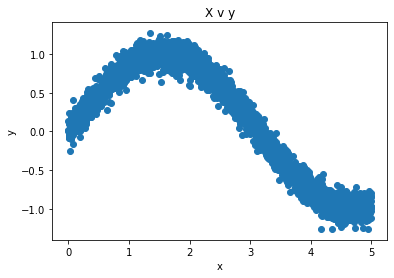

In [3]:
x = np.linspace(0, 5, 3000)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0])
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [5]:
scores, predictions, models = compare_models(X, y, [fit_bartpy])

In [6]:
scores

[[0.9789550490704987], [0.9810618793643394]]

In [7]:
scores, predictions, trained_models = compare_models(X, y)

0:	learn: 0.6954822	test: 0.7095555	best: 0.7095555 (0)	total: 62.8ms	remaining: 1m 2s
1:	learn: 0.6763091	test: 0.6899190	best: 0.6899190 (1)	total: 69.3ms	remaining: 34.6s
2:	learn: 0.6577083	test: 0.6707034	best: 0.6707034 (2)	total: 76ms	remaining: 25.2s
3:	learn: 0.6391630	test: 0.6517767	best: 0.6517767 (3)	total: 85.4ms	remaining: 21.3s
4:	learn: 0.6215248	test: 0.6337459	best: 0.6337459 (4)	total: 95.1ms	remaining: 18.9s
5:	learn: 0.6046175	test: 0.6163873	best: 0.6163873 (5)	total: 105ms	remaining: 17.5s
6:	learn: 0.5881409	test: 0.5994458	best: 0.5994458 (6)	total: 117ms	remaining: 16.5s
7:	learn: 0.5722487	test: 0.5830519	best: 0.5830519 (7)	total: 129ms	remaining: 16s
8:	learn: 0.5565266	test: 0.5668920	best: 0.5668920 (8)	total: 137ms	remaining: 15.1s
9:	learn: 0.5419223	test: 0.5518901	best: 0.5518901 (9)	total: 147ms	remaining: 14.5s
10:	learn: 0.5274760	test: 0.5368665	best: 0.5368665 (10)	total: 155ms	remaining: 13.9s
11:	learn: 0.5135062	test: 0.5224108	best: 0.522410

114:	learn: 0.1041201	test: 0.1008844	best: 0.1008844 (114)	total: 1.05s	remaining: 8.07s
115:	learn: 0.1038186	test: 0.1005924	best: 0.1005924 (115)	total: 1.06s	remaining: 8.05s
116:	learn: 0.1035970	test: 0.1003728	best: 0.1003728 (116)	total: 1.06s	remaining: 8.04s
117:	learn: 0.1033991	test: 0.1001927	best: 0.1001927 (117)	total: 1.07s	remaining: 8.03s
118:	learn: 0.1031524	test: 0.0999389	best: 0.0999389 (118)	total: 1.08s	remaining: 8.04s
119:	learn: 0.1029088	test: 0.0996893	best: 0.0996893 (119)	total: 1.09s	remaining: 8.01s
120:	learn: 0.1027347	test: 0.0995247	best: 0.0995247 (120)	total: 1.1s	remaining: 8.01s
121:	learn: 0.1025929	test: 0.0993852	best: 0.0993852 (121)	total: 1.11s	remaining: 8.01s
122:	learn: 0.1024245	test: 0.0992321	best: 0.0992321 (122)	total: 1.12s	remaining: 7.98s
123:	learn: 0.1022480	test: 0.0990421	best: 0.0990421 (123)	total: 1.13s	remaining: 7.98s
124:	learn: 0.1020683	test: 0.0988625	best: 0.0988625 (124)	total: 1.14s	remaining: 7.97s
125:	learn:

207:	learn: 0.0981439	test: 0.0952834	best: 0.0952834 (207)	total: 1.84s	remaining: 7.02s
208:	learn: 0.0981129	test: 0.0952497	best: 0.0952497 (208)	total: 1.85s	remaining: 7.02s
209:	learn: 0.0981005	test: 0.0952554	best: 0.0952497 (208)	total: 1.86s	remaining: 7.01s
210:	learn: 0.0980938	test: 0.0952441	best: 0.0952441 (210)	total: 1.87s	remaining: 7s
211:	learn: 0.0980904	test: 0.0952409	best: 0.0952409 (211)	total: 1.88s	remaining: 6.99s
212:	learn: 0.0980799	test: 0.0952299	best: 0.0952299 (212)	total: 1.89s	remaining: 6.98s
213:	learn: 0.0980616	test: 0.0952180	best: 0.0952180 (213)	total: 1.9s	remaining: 6.96s
214:	learn: 0.0980520	test: 0.0952070	best: 0.0952070 (214)	total: 1.9s	remaining: 6.95s
215:	learn: 0.0980302	test: 0.0952100	best: 0.0952070 (214)	total: 1.91s	remaining: 6.93s
216:	learn: 0.0980035	test: 0.0951946	best: 0.0951946 (216)	total: 1.91s	remaining: 6.91s
217:	learn: 0.0979964	test: 0.0951882	best: 0.0951882 (217)	total: 1.92s	remaining: 6.89s
218:	learn: 0.0

300:	learn: 0.0969352	test: 0.0948717	best: 0.0948717 (300)	total: 2.63s	remaining: 6.12s
301:	learn: 0.0969151	test: 0.0948663	best: 0.0948663 (301)	total: 2.65s	remaining: 6.12s
302:	learn: 0.0969037	test: 0.0948534	best: 0.0948534 (302)	total: 2.66s	remaining: 6.11s
303:	learn: 0.0968869	test: 0.0948468	best: 0.0948468 (303)	total: 2.66s	remaining: 6.09s
304:	learn: 0.0968802	test: 0.0948454	best: 0.0948454 (304)	total: 2.67s	remaining: 6.09s
305:	learn: 0.0968779	test: 0.0948430	best: 0.0948430 (305)	total: 2.68s	remaining: 6.07s
306:	learn: 0.0968726	test: 0.0948367	best: 0.0948367 (306)	total: 2.68s	remaining: 6.06s
307:	learn: 0.0968590	test: 0.0948349	best: 0.0948349 (307)	total: 2.69s	remaining: 6.06s
308:	learn: 0.0968446	test: 0.0948334	best: 0.0948334 (308)	total: 2.7s	remaining: 6.04s
309:	learn: 0.0968248	test: 0.0948267	best: 0.0948267 (309)	total: 2.71s	remaining: 6.04s
310:	learn: 0.0968228	test: 0.0948261	best: 0.0948261 (310)	total: 2.72s	remaining: 6.03s
311:	learn:

393:	learn: 0.0960498	test: 0.0948116	best: 0.0947944 (337)	total: 3.43s	remaining: 5.27s
394:	learn: 0.0960466	test: 0.0948080	best: 0.0947944 (337)	total: 3.44s	remaining: 5.26s
395:	learn: 0.0960370	test: 0.0948128	best: 0.0947944 (337)	total: 3.44s	remaining: 5.25s
396:	learn: 0.0960344	test: 0.0948078	best: 0.0947944 (337)	total: 3.45s	remaining: 5.24s
397:	learn: 0.0960278	test: 0.0948001	best: 0.0947944 (337)	total: 3.46s	remaining: 5.23s
398:	learn: 0.0960149	test: 0.0947958	best: 0.0947944 (337)	total: 3.47s	remaining: 5.22s
399:	learn: 0.0960064	test: 0.0947923	best: 0.0947923 (399)	total: 3.48s	remaining: 5.22s
400:	learn: 0.0960003	test: 0.0947941	best: 0.0947923 (399)	total: 3.48s	remaining: 5.21s
401:	learn: 0.0959897	test: 0.0947893	best: 0.0947893 (401)	total: 3.49s	remaining: 5.2s
402:	learn: 0.0959808	test: 0.0947824	best: 0.0947824 (402)	total: 3.51s	remaining: 5.19s
403:	learn: 0.0959770	test: 0.0947818	best: 0.0947818 (403)	total: 3.52s	remaining: 5.19s
404:	learn:

486:	learn: 0.0954550	test: 0.0949048	best: 0.0947742 (405)	total: 4.22s	remaining: 4.44s
487:	learn: 0.0954504	test: 0.0949009	best: 0.0947742 (405)	total: 4.23s	remaining: 4.43s
488:	learn: 0.0954470	test: 0.0949021	best: 0.0947742 (405)	total: 4.23s	remaining: 4.42s
489:	learn: 0.0954453	test: 0.0949001	best: 0.0947742 (405)	total: 4.24s	remaining: 4.41s
490:	learn: 0.0954331	test: 0.0948926	best: 0.0947742 (405)	total: 4.25s	remaining: 4.4s
491:	learn: 0.0954225	test: 0.0948952	best: 0.0947742 (405)	total: 4.26s	remaining: 4.4s
492:	learn: 0.0954163	test: 0.0949011	best: 0.0947742 (405)	total: 4.26s	remaining: 4.38s
493:	learn: 0.0954116	test: 0.0949013	best: 0.0947742 (405)	total: 4.28s	remaining: 4.38s
494:	learn: 0.0953904	test: 0.0949062	best: 0.0947742 (405)	total: 4.29s	remaining: 4.37s
495:	learn: 0.0953854	test: 0.0949082	best: 0.0947742 (405)	total: 4.29s	remaining: 4.36s
496:	learn: 0.0953844	test: 0.0949063	best: 0.0947742 (405)	total: 4.3s	remaining: 4.36s
497:	learn: 0

582:	learn: 0.0949320	test: 0.0950542	best: 0.0947742 (405)	total: 5.01s	remaining: 3.59s
583:	learn: 0.0949249	test: 0.0950626	best: 0.0947742 (405)	total: 5.02s	remaining: 3.58s
584:	learn: 0.0949191	test: 0.0950681	best: 0.0947742 (405)	total: 5.03s	remaining: 3.57s
585:	learn: 0.0949128	test: 0.0950699	best: 0.0947742 (405)	total: 5.04s	remaining: 3.56s
586:	learn: 0.0949086	test: 0.0950726	best: 0.0947742 (405)	total: 5.05s	remaining: 3.56s
587:	learn: 0.0949061	test: 0.0950759	best: 0.0947742 (405)	total: 5.06s	remaining: 3.55s
588:	learn: 0.0949030	test: 0.0950809	best: 0.0947742 (405)	total: 5.07s	remaining: 3.54s
589:	learn: 0.0949006	test: 0.0950789	best: 0.0947742 (405)	total: 5.08s	remaining: 3.53s
590:	learn: 0.0948975	test: 0.0950864	best: 0.0947742 (405)	total: 5.09s	remaining: 3.52s
591:	learn: 0.0948893	test: 0.0950967	best: 0.0947742 (405)	total: 5.1s	remaining: 3.52s
592:	learn: 0.0948874	test: 0.0950963	best: 0.0947742 (405)	total: 5.11s	remaining: 3.5s
593:	learn: 

675:	learn: 0.0945438	test: 0.0953346	best: 0.0947742 (405)	total: 5.8s	remaining: 2.78s
676:	learn: 0.0945362	test: 0.0953442	best: 0.0947742 (405)	total: 5.81s	remaining: 2.77s
677:	learn: 0.0945340	test: 0.0953488	best: 0.0947742 (405)	total: 5.82s	remaining: 2.76s
678:	learn: 0.0945290	test: 0.0953586	best: 0.0947742 (405)	total: 5.83s	remaining: 2.75s
679:	learn: 0.0945255	test: 0.0953615	best: 0.0947742 (405)	total: 5.83s	remaining: 2.74s
680:	learn: 0.0945217	test: 0.0953667	best: 0.0947742 (405)	total: 5.84s	remaining: 2.74s
681:	learn: 0.0945192	test: 0.0953734	best: 0.0947742 (405)	total: 5.85s	remaining: 2.73s
682:	learn: 0.0945176	test: 0.0953767	best: 0.0947742 (405)	total: 5.86s	remaining: 2.72s
683:	learn: 0.0945123	test: 0.0953763	best: 0.0947742 (405)	total: 5.86s	remaining: 2.71s
684:	learn: 0.0945106	test: 0.0953822	best: 0.0947742 (405)	total: 5.87s	remaining: 2.7s
685:	learn: 0.0945048	test: 0.0953805	best: 0.0947742 (405)	total: 5.88s	remaining: 2.69s
686:	learn: 

769:	learn: 0.0941805	test: 0.0955644	best: 0.0947742 (405)	total: 6.59s	remaining: 1.97s
770:	learn: 0.0941731	test: 0.0955642	best: 0.0947742 (405)	total: 6.6s	remaining: 1.96s
771:	learn: 0.0941709	test: 0.0955638	best: 0.0947742 (405)	total: 6.61s	remaining: 1.95s
772:	learn: 0.0941694	test: 0.0955620	best: 0.0947742 (405)	total: 6.62s	remaining: 1.94s
773:	learn: 0.0941638	test: 0.0955613	best: 0.0947742 (405)	total: 6.63s	remaining: 1.94s
774:	learn: 0.0941628	test: 0.0955633	best: 0.0947742 (405)	total: 6.64s	remaining: 1.93s
775:	learn: 0.0941607	test: 0.0955689	best: 0.0947742 (405)	total: 6.65s	remaining: 1.92s
776:	learn: 0.0941481	test: 0.0955761	best: 0.0947742 (405)	total: 6.66s	remaining: 1.91s
777:	learn: 0.0941468	test: 0.0955797	best: 0.0947742 (405)	total: 6.67s	remaining: 1.9s
778:	learn: 0.0941457	test: 0.0955788	best: 0.0947742 (405)	total: 6.67s	remaining: 1.89s
779:	learn: 0.0941435	test: 0.0955778	best: 0.0947742 (405)	total: 6.68s	remaining: 1.88s
780:	learn: 

863:	learn: 0.0938573	test: 0.0957276	best: 0.0947742 (405)	total: 7.38s	remaining: 1.16s
864:	learn: 0.0938544	test: 0.0957297	best: 0.0947742 (405)	total: 7.39s	remaining: 1.15s
865:	learn: 0.0938482	test: 0.0957331	best: 0.0947742 (405)	total: 7.4s	remaining: 1.14s
866:	learn: 0.0938442	test: 0.0957418	best: 0.0947742 (405)	total: 7.41s	remaining: 1.14s
867:	learn: 0.0938405	test: 0.0957426	best: 0.0947742 (405)	total: 7.42s	remaining: 1.13s
868:	learn: 0.0938290	test: 0.0957418	best: 0.0947742 (405)	total: 7.43s	remaining: 1.12s
869:	learn: 0.0938240	test: 0.0957515	best: 0.0947742 (405)	total: 7.43s	remaining: 1.11s
870:	learn: 0.0938228	test: 0.0957574	best: 0.0947742 (405)	total: 7.44s	remaining: 1.1s
871:	learn: 0.0938223	test: 0.0957584	best: 0.0947742 (405)	total: 7.45s	remaining: 1.09s
872:	learn: 0.0938197	test: 0.0957608	best: 0.0947742 (405)	total: 7.45s	remaining: 1.08s
873:	learn: 0.0938170	test: 0.0957648	best: 0.0947742 (405)	total: 7.46s	remaining: 1.08s
874:	learn: 

957:	learn: 0.0935447	test: 0.0959003	best: 0.0947742 (405)	total: 8.18s	remaining: 359ms
958:	learn: 0.0935421	test: 0.0959029	best: 0.0947742 (405)	total: 8.2s	remaining: 350ms
959:	learn: 0.0935398	test: 0.0959099	best: 0.0947742 (405)	total: 8.2s	remaining: 342ms
960:	learn: 0.0935343	test: 0.0959125	best: 0.0947742 (405)	total: 8.21s	remaining: 333ms
961:	learn: 0.0935303	test: 0.0959082	best: 0.0947742 (405)	total: 8.22s	remaining: 325ms
962:	learn: 0.0935266	test: 0.0959081	best: 0.0947742 (405)	total: 8.23s	remaining: 316ms
963:	learn: 0.0935262	test: 0.0959106	best: 0.0947742 (405)	total: 8.24s	remaining: 308ms
964:	learn: 0.0935253	test: 0.0959099	best: 0.0947742 (405)	total: 8.24s	remaining: 299ms
965:	learn: 0.0935235	test: 0.0959139	best: 0.0947742 (405)	total: 8.25s	remaining: 290ms
966:	learn: 0.0935222	test: 0.0959155	best: 0.0947742 (405)	total: 8.26s	remaining: 282ms
967:	learn: 0.0935155	test: 0.0959141	best: 0.0947742 (405)	total: 8.27s	remaining: 273ms
968:	learn: 

66:	learn: 0.1500390	test: 0.1570220	best: 0.1570220 (66)	total: 621ms	remaining: 8.65s
67:	learn: 0.1479300	test: 0.1549392	best: 0.1549392 (67)	total: 630ms	remaining: 8.63s
68:	learn: 0.1458404	test: 0.1528577	best: 0.1528577 (68)	total: 640ms	remaining: 8.63s
69:	learn: 0.1438113	test: 0.1508597	best: 0.1508597 (69)	total: 650ms	remaining: 8.63s
70:	learn: 0.1418161	test: 0.1489542	best: 0.1489542 (70)	total: 660ms	remaining: 8.63s
71:	learn: 0.1400009	test: 0.1471816	best: 0.1471816 (71)	total: 665ms	remaining: 8.57s
72:	learn: 0.1382575	test: 0.1454622	best: 0.1454622 (72)	total: 675ms	remaining: 8.57s
73:	learn: 0.1365833	test: 0.1438313	best: 0.1438313 (73)	total: 684ms	remaining: 8.56s
74:	learn: 0.1349310	test: 0.1422029	best: 0.1422029 (74)	total: 694ms	remaining: 8.56s
75:	learn: 0.1334064	test: 0.1408110	best: 0.1408110 (75)	total: 703ms	remaining: 8.55s
76:	learn: 0.1318224	test: 0.1393427	best: 0.1393427 (76)	total: 713ms	remaining: 8.55s
77:	learn: 0.1304060	test: 0.137

170:	learn: 0.0999735	test: 0.1090209	best: 0.1090209 (170)	total: 1.6s	remaining: 7.78s
171:	learn: 0.0999541	test: 0.1089990	best: 0.1089990 (171)	total: 1.62s	remaining: 7.78s
172:	learn: 0.0999165	test: 0.1089752	best: 0.1089752 (172)	total: 1.63s	remaining: 7.79s
173:	learn: 0.0998823	test: 0.1089612	best: 0.1089612 (173)	total: 1.64s	remaining: 7.77s
174:	learn: 0.0998650	test: 0.1089501	best: 0.1089501 (174)	total: 1.64s	remaining: 7.75s
175:	learn: 0.0998507	test: 0.1089244	best: 0.1089244 (175)	total: 1.65s	remaining: 7.73s
176:	learn: 0.0998328	test: 0.1089135	best: 0.1089135 (176)	total: 1.66s	remaining: 7.71s
177:	learn: 0.0998202	test: 0.1089052	best: 0.1089052 (177)	total: 1.67s	remaining: 7.7s
178:	learn: 0.0998004	test: 0.1088958	best: 0.1088958 (178)	total: 1.67s	remaining: 7.67s
179:	learn: 0.0997689	test: 0.1088842	best: 0.1088842 (179)	total: 1.68s	remaining: 7.66s
180:	learn: 0.0997431	test: 0.1088783	best: 0.1088783 (180)	total: 1.69s	remaining: 7.66s
181:	learn: 

282:	learn: 0.0984273	test: 0.1088256	best: 0.1087387 (234)	total: 2.6s	remaining: 6.59s
283:	learn: 0.0984087	test: 0.1088206	best: 0.1087387 (234)	total: 2.61s	remaining: 6.58s
284:	learn: 0.0984012	test: 0.1088279	best: 0.1087387 (234)	total: 2.62s	remaining: 6.58s
285:	learn: 0.0983948	test: 0.1088289	best: 0.1087387 (234)	total: 2.63s	remaining: 6.57s
286:	learn: 0.0983904	test: 0.1088331	best: 0.1087387 (234)	total: 2.64s	remaining: 6.55s
287:	learn: 0.0983764	test: 0.1088547	best: 0.1087387 (234)	total: 2.65s	remaining: 6.55s
288:	learn: 0.0983680	test: 0.1088443	best: 0.1087387 (234)	total: 2.66s	remaining: 6.54s
289:	learn: 0.0983584	test: 0.1088423	best: 0.1087387 (234)	total: 2.67s	remaining: 6.54s
290:	learn: 0.0983486	test: 0.1088432	best: 0.1087387 (234)	total: 2.68s	remaining: 6.53s
291:	learn: 0.0983435	test: 0.1088400	best: 0.1087387 (234)	total: 2.69s	remaining: 6.52s
292:	learn: 0.0983332	test: 0.1088315	best: 0.1087387 (234)	total: 2.69s	remaining: 6.5s
293:	learn: 

389:	learn: 0.0975402	test: 0.1092239	best: 0.1087387 (234)	total: 3.59s	remaining: 5.62s
390:	learn: 0.0975362	test: 0.1092282	best: 0.1087387 (234)	total: 3.6s	remaining: 5.61s
391:	learn: 0.0975280	test: 0.1092279	best: 0.1087387 (234)	total: 3.61s	remaining: 5.6s
392:	learn: 0.0975182	test: 0.1092435	best: 0.1087387 (234)	total: 3.62s	remaining: 5.59s
393:	learn: 0.0975135	test: 0.1092562	best: 0.1087387 (234)	total: 3.63s	remaining: 5.58s
394:	learn: 0.0975093	test: 0.1092580	best: 0.1087387 (234)	total: 3.64s	remaining: 5.57s
395:	learn: 0.0974891	test: 0.1092542	best: 0.1087387 (234)	total: 3.64s	remaining: 5.56s
396:	learn: 0.0974839	test: 0.1092592	best: 0.1087387 (234)	total: 3.65s	remaining: 5.55s
397:	learn: 0.0974762	test: 0.1092569	best: 0.1087387 (234)	total: 3.66s	remaining: 5.54s
398:	learn: 0.0974682	test: 0.1092674	best: 0.1087387 (234)	total: 3.67s	remaining: 5.53s
399:	learn: 0.0974572	test: 0.1092659	best: 0.1087387 (234)	total: 3.68s	remaining: 5.51s
400:	learn: 

501:	learn: 0.0968650	test: 0.1095752	best: 0.1087387 (234)	total: 4.59s	remaining: 4.56s
502:	learn: 0.0968635	test: 0.1095742	best: 0.1087387 (234)	total: 4.6s	remaining: 4.55s
503:	learn: 0.0968587	test: 0.1095733	best: 0.1087387 (234)	total: 4.61s	remaining: 4.54s
504:	learn: 0.0968562	test: 0.1095713	best: 0.1087387 (234)	total: 4.62s	remaining: 4.53s
505:	learn: 0.0968535	test: 0.1095727	best: 0.1087387 (234)	total: 4.63s	remaining: 4.52s
506:	learn: 0.0968510	test: 0.1095698	best: 0.1087387 (234)	total: 4.64s	remaining: 4.51s
507:	learn: 0.0968425	test: 0.1095925	best: 0.1087387 (234)	total: 4.65s	remaining: 4.5s
508:	learn: 0.0968399	test: 0.1096047	best: 0.1087387 (234)	total: 4.66s	remaining: 4.49s
509:	learn: 0.0968361	test: 0.1096115	best: 0.1087387 (234)	total: 4.67s	remaining: 4.48s
510:	learn: 0.0968325	test: 0.1096106	best: 0.1087387 (234)	total: 4.67s	remaining: 4.47s
511:	learn: 0.0968316	test: 0.1096142	best: 0.1087387 (234)	total: 4.68s	remaining: 4.46s
512:	learn: 

609:	learn: 0.0962093	test: 0.1098900	best: 0.1087387 (234)	total: 5.6s	remaining: 3.58s
610:	learn: 0.0961858	test: 0.1098914	best: 0.1087387 (234)	total: 5.61s	remaining: 3.57s
611:	learn: 0.0961659	test: 0.1098918	best: 0.1087387 (234)	total: 5.62s	remaining: 3.56s
612:	learn: 0.0961588	test: 0.1098916	best: 0.1087387 (234)	total: 5.64s	remaining: 3.56s
613:	learn: 0.0961503	test: 0.1099036	best: 0.1087387 (234)	total: 5.65s	remaining: 3.55s
614:	learn: 0.0961409	test: 0.1099036	best: 0.1087387 (234)	total: 5.66s	remaining: 3.54s
615:	learn: 0.0961381	test: 0.1099092	best: 0.1087387 (234)	total: 5.67s	remaining: 3.54s
616:	learn: 0.0961248	test: 0.1099064	best: 0.1087387 (234)	total: 5.68s	remaining: 3.53s
617:	learn: 0.0961206	test: 0.1099064	best: 0.1087387 (234)	total: 5.7s	remaining: 3.52s
618:	learn: 0.0961121	test: 0.1099039	best: 0.1087387 (234)	total: 5.71s	remaining: 3.51s
619:	learn: 0.0961051	test: 0.1099078	best: 0.1087387 (234)	total: 5.71s	remaining: 3.5s
620:	learn: 0

715:	learn: 0.0956204	test: 0.1101875	best: 0.1087387 (234)	total: 6.58s	remaining: 2.61s
716:	learn: 0.0956188	test: 0.1101865	best: 0.1087387 (234)	total: 6.59s	remaining: 2.6s
717:	learn: 0.0956179	test: 0.1101881	best: 0.1087387 (234)	total: 6.61s	remaining: 2.59s
718:	learn: 0.0956161	test: 0.1101891	best: 0.1087387 (234)	total: 6.61s	remaining: 2.58s
719:	learn: 0.0956121	test: 0.1101845	best: 0.1087387 (234)	total: 6.62s	remaining: 2.58s
720:	learn: 0.0956004	test: 0.1101968	best: 0.1087387 (234)	total: 6.63s	remaining: 2.57s
721:	learn: 0.0955984	test: 0.1102003	best: 0.1087387 (234)	total: 6.64s	remaining: 2.56s
722:	learn: 0.0955897	test: 0.1101941	best: 0.1087387 (234)	total: 6.65s	remaining: 2.55s
723:	learn: 0.0955805	test: 0.1101864	best: 0.1087387 (234)	total: 6.66s	remaining: 2.54s
724:	learn: 0.0955764	test: 0.1101942	best: 0.1087387 (234)	total: 6.67s	remaining: 2.53s
725:	learn: 0.0955697	test: 0.1101920	best: 0.1087387 (234)	total: 6.68s	remaining: 2.52s
726:	learn:

823:	learn: 0.0951197	test: 0.1104828	best: 0.1087387 (234)	total: 7.58s	remaining: 1.62s
824:	learn: 0.0951158	test: 0.1104784	best: 0.1087387 (234)	total: 7.59s	remaining: 1.61s
825:	learn: 0.0951134	test: 0.1104806	best: 0.1087387 (234)	total: 7.6s	remaining: 1.6s
826:	learn: 0.0951001	test: 0.1104859	best: 0.1087387 (234)	total: 7.61s	remaining: 1.59s
827:	learn: 0.0950964	test: 0.1104907	best: 0.1087387 (234)	total: 7.62s	remaining: 1.58s
828:	learn: 0.0950931	test: 0.1104869	best: 0.1087387 (234)	total: 7.63s	remaining: 1.57s
829:	learn: 0.0950913	test: 0.1104883	best: 0.1087387 (234)	total: 7.63s	remaining: 1.56s
830:	learn: 0.0950867	test: 0.1104920	best: 0.1087387 (234)	total: 7.64s	remaining: 1.55s
831:	learn: 0.0950802	test: 0.1104767	best: 0.1087387 (234)	total: 7.65s	remaining: 1.54s
832:	learn: 0.0950738	test: 0.1104768	best: 0.1087387 (234)	total: 7.66s	remaining: 1.54s
833:	learn: 0.0950707	test: 0.1104775	best: 0.1087387 (234)	total: 7.67s	remaining: 1.53s
834:	learn: 

936:	learn: 0.0945409	test: 0.1108201	best: 0.1087387 (234)	total: 8.58s	remaining: 577ms
937:	learn: 0.0945401	test: 0.1108232	best: 0.1087387 (234)	total: 8.59s	remaining: 568ms
938:	learn: 0.0945376	test: 0.1108210	best: 0.1087387 (234)	total: 8.6s	remaining: 559ms
939:	learn: 0.0945363	test: 0.1108257	best: 0.1087387 (234)	total: 8.61s	remaining: 549ms
940:	learn: 0.0945338	test: 0.1108264	best: 0.1087387 (234)	total: 8.62s	remaining: 540ms
941:	learn: 0.0945318	test: 0.1108258	best: 0.1087387 (234)	total: 8.62s	remaining: 531ms
942:	learn: 0.0945261	test: 0.1108235	best: 0.1087387 (234)	total: 8.63s	remaining: 522ms
943:	learn: 0.0945240	test: 0.1108278	best: 0.1087387 (234)	total: 8.65s	remaining: 513ms
944:	learn: 0.0945159	test: 0.1108400	best: 0.1087387 (234)	total: 8.65s	remaining: 504ms
945:	learn: 0.0945144	test: 0.1108427	best: 0.1087387 (234)	total: 8.67s	remaining: 495ms
946:	learn: 0.0945126	test: 0.1108418	best: 0.1087387 (234)	total: 8.68s	remaining: 486ms
947:	learn:

**As we might expect, all three models are capable of capturing such a simple function.  There's very little difference between the scores or predictions of the models.**

In [8]:
scores

[[0.979045764321419, 0.9791682092969328, 0.9796324408332014],
 [0.9810918544735694, 0.9815445419118793, 0.9817296470143478]]

Text(0, 0.5, 'Predicted Target')

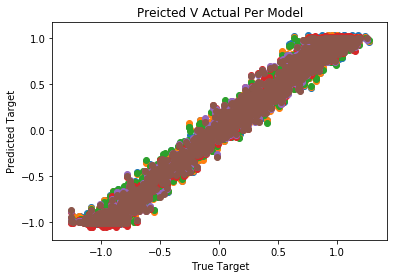

In [9]:
kf = KFold(2)
for p, (train_index, test_index) in zip(predictions, kf.split(X)):
    for m in p:
        plt.scatter(y[test_index], m)
plt.title("Preicted V Actual Per Model")
plt.xlabel("True Target")
plt.ylabel("Predicted Target")

Text(0.5, 1.0, 'Prediction by model by value of X')

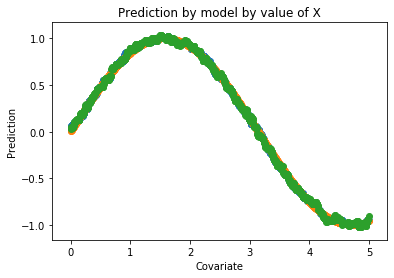

In [10]:
plt.scatter(X[:1500,0],predictions[0][1])
plt.scatter(X[:1500,0],predictions[0][2])
plt.scatter(X[:1500,0],predictions[0][0])
plt.ylabel("Prediction")
plt.xlabel("Covariate")
plt.title("Prediction by model by value of X")

## Single dimension - multiple waves

** To extend our original model, let's add a high frequency cosine wave in our single dimension.  This will make the predicted function change faster and at varying rates across x **

Text(0.5, 1.0, 'X v y')

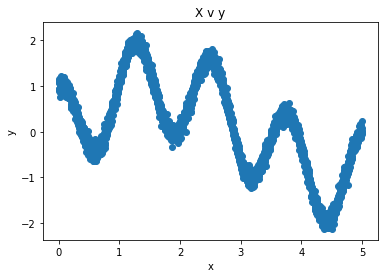

In [11]:
x = np.linspace(0, 5, 3000)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0]) + np.cos(5 * X[:, 0])
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [12]:
scores, predictions, trained_models = compare_models(X, y)

0:	learn: 0.9510017	test: 1.0499776	best: 1.0499776 (0)	total: 14.5ms	remaining: 14.5s
1:	learn: 0.9314879	test: 1.0295107	best: 1.0295107 (1)	total: 26.7ms	remaining: 13.3s
2:	learn: 0.9124049	test: 1.0091465	best: 1.0091465 (2)	total: 34.5ms	remaining: 11.5s
3:	learn: 0.8940602	test: 0.9893514	best: 0.9893514 (3)	total: 47.5ms	remaining: 11.8s
4:	learn: 0.8779863	test: 0.9724424	best: 0.9724424 (4)	total: 56ms	remaining: 11.1s
5:	learn: 0.8616999	test: 0.9549919	best: 0.9549919 (5)	total: 65.8ms	remaining: 10.9s
6:	learn: 0.8454215	test: 0.9362046	best: 0.9362046 (6)	total: 76.1ms	remaining: 10.8s
7:	learn: 0.8281796	test: 0.9168701	best: 0.9168701 (7)	total: 82.5ms	remaining: 10.2s
8:	learn: 0.8120120	test: 0.8991520	best: 0.8991520 (8)	total: 88.4ms	remaining: 9.74s
9:	learn: 0.7986716	test: 0.8848174	best: 0.8848174 (9)	total: 99.4ms	remaining: 9.85s
10:	learn: 0.7843128	test: 0.8695451	best: 0.8695451 (10)	total: 109ms	remaining: 9.84s
11:	learn: 0.7696672	test: 0.8535310	best: 0

113:	learn: 0.2168775	test: 0.2365798	best: 0.2365798 (113)	total: 1.01s	remaining: 7.87s
114:	learn: 0.2149532	test: 0.2346451	best: 0.2346451 (114)	total: 1.02s	remaining: 7.87s
115:	learn: 0.2132915	test: 0.2329745	best: 0.2329745 (115)	total: 1.03s	remaining: 7.87s
116:	learn: 0.2120341	test: 0.2315996	best: 0.2315996 (116)	total: 1.04s	remaining: 7.86s
117:	learn: 0.2106100	test: 0.2299610	best: 0.2299610 (117)	total: 1.05s	remaining: 7.84s
118:	learn: 0.2090060	test: 0.2281125	best: 0.2281125 (118)	total: 1.06s	remaining: 7.84s
119:	learn: 0.2073686	test: 0.2264178	best: 0.2264178 (119)	total: 1.07s	remaining: 7.84s
120:	learn: 0.2062900	test: 0.2253350	best: 0.2253350 (120)	total: 1.08s	remaining: 7.83s
121:	learn: 0.2046860	test: 0.2234386	best: 0.2234386 (121)	total: 1.09s	remaining: 7.84s
122:	learn: 0.2037675	test: 0.2224213	best: 0.2224213 (122)	total: 1.09s	remaining: 7.81s
123:	learn: 0.2024885	test: 0.2209692	best: 0.2209692 (123)	total: 1.11s	remaining: 7.81s
124:	learn

225:	learn: 0.1347838	test: 0.1424777	best: 0.1424777 (225)	total: 2.01s	remaining: 6.89s
226:	learn: 0.1344189	test: 0.1419448	best: 0.1419448 (226)	total: 2.02s	remaining: 6.88s
227:	learn: 0.1340503	test: 0.1414296	best: 0.1414296 (227)	total: 2.03s	remaining: 6.87s
228:	learn: 0.1336085	test: 0.1409047	best: 0.1409047 (228)	total: 2.04s	remaining: 6.86s
229:	learn: 0.1333135	test: 0.1405102	best: 0.1405102 (229)	total: 2.04s	remaining: 6.85s
230:	learn: 0.1329882	test: 0.1401494	best: 0.1401494 (230)	total: 2.05s	remaining: 6.84s
231:	learn: 0.1328230	test: 0.1399871	best: 0.1399871 (231)	total: 2.06s	remaining: 6.82s
232:	learn: 0.1326074	test: 0.1396676	best: 0.1396676 (232)	total: 2.07s	remaining: 6.82s
233:	learn: 0.1324543	test: 0.1394786	best: 0.1394786 (233)	total: 2.08s	remaining: 6.81s
234:	learn: 0.1321958	test: 0.1391543	best: 0.1391543 (234)	total: 2.09s	remaining: 6.81s
235:	learn: 0.1319802	test: 0.1389118	best: 0.1389118 (235)	total: 2.1s	remaining: 6.79s
236:	learn:

337:	learn: 0.1199951	test: 0.1232911	best: 0.1232911 (337)	total: 3.02s	remaining: 5.91s
338:	learn: 0.1199770	test: 0.1232438	best: 0.1232438 (338)	total: 3.03s	remaining: 5.9s
339:	learn: 0.1198490	test: 0.1230478	best: 0.1230478 (339)	total: 3.03s	remaining: 5.89s
340:	learn: 0.1198053	test: 0.1230100	best: 0.1230100 (340)	total: 3.04s	remaining: 5.88s
341:	learn: 0.1197266	test: 0.1229178	best: 0.1229178 (341)	total: 3.05s	remaining: 5.87s
342:	learn: 0.1196868	test: 0.1228837	best: 0.1228837 (342)	total: 3.06s	remaining: 5.87s
343:	learn: 0.1195339	test: 0.1226100	best: 0.1226100 (343)	total: 3.07s	remaining: 5.85s
344:	learn: 0.1195102	test: 0.1225929	best: 0.1225929 (344)	total: 3.08s	remaining: 5.84s
345:	learn: 0.1194103	test: 0.1224645	best: 0.1224645 (345)	total: 3.09s	remaining: 5.84s
346:	learn: 0.1193550	test: 0.1223785	best: 0.1223785 (346)	total: 3.1s	remaining: 5.83s
347:	learn: 0.1192351	test: 0.1221598	best: 0.1221598 (347)	total: 3.11s	remaining: 5.82s
348:	learn: 

446:	learn: 0.1144402	test: 0.1157413	best: 0.1157413 (446)	total: 4.01s	remaining: 4.96s
447:	learn: 0.1144100	test: 0.1156918	best: 0.1156918 (447)	total: 4.02s	remaining: 4.95s
448:	learn: 0.1143636	test: 0.1156660	best: 0.1156660 (448)	total: 4.02s	remaining: 4.94s
449:	learn: 0.1143472	test: 0.1156545	best: 0.1156545 (449)	total: 4.04s	remaining: 4.93s
450:	learn: 0.1143019	test: 0.1155612	best: 0.1155612 (450)	total: 4.05s	remaining: 4.93s
451:	learn: 0.1142888	test: 0.1155464	best: 0.1155464 (451)	total: 4.06s	remaining: 4.92s
452:	learn: 0.1142395	test: 0.1154098	best: 0.1154098 (452)	total: 4.07s	remaining: 4.91s
453:	learn: 0.1142193	test: 0.1153661	best: 0.1153661 (453)	total: 4.08s	remaining: 4.9s
454:	learn: 0.1141868	test: 0.1153257	best: 0.1153257 (454)	total: 4.08s	remaining: 4.89s
455:	learn: 0.1141768	test: 0.1153133	best: 0.1153133 (455)	total: 4.09s	remaining: 4.88s
456:	learn: 0.1141736	test: 0.1153123	best: 0.1153123 (456)	total: 4.11s	remaining: 4.88s
457:	learn:

555:	learn: 0.1113919	test: 0.1122763	best: 0.1122763 (555)	total: 5s	remaining: 4s
556:	learn: 0.1113699	test: 0.1122637	best: 0.1122637 (556)	total: 5.01s	remaining: 3.99s
557:	learn: 0.1113639	test: 0.1122572	best: 0.1122572 (557)	total: 5.02s	remaining: 3.98s
558:	learn: 0.1113430	test: 0.1122166	best: 0.1122166 (558)	total: 5.04s	remaining: 3.97s
559:	learn: 0.1113191	test: 0.1121911	best: 0.1121911 (559)	total: 5.04s	remaining: 3.96s
560:	learn: 0.1113065	test: 0.1121812	best: 0.1121812 (560)	total: 5.05s	remaining: 3.95s
561:	learn: 0.1112370	test: 0.1120706	best: 0.1120706 (561)	total: 5.06s	remaining: 3.94s
562:	learn: 0.1112139	test: 0.1120417	best: 0.1120417 (562)	total: 5.07s	remaining: 3.93s
563:	learn: 0.1111803	test: 0.1120042	best: 0.1120042 (563)	total: 5.08s	remaining: 3.92s
564:	learn: 0.1111643	test: 0.1119795	best: 0.1119795 (564)	total: 5.09s	remaining: 3.92s
565:	learn: 0.1111509	test: 0.1119513	best: 0.1119513 (565)	total: 5.09s	remaining: 3.91s
566:	learn: 0.11

660:	learn: 0.1092945	test: 0.1102507	best: 0.1102507 (660)	total: 5.99s	remaining: 3.07s
661:	learn: 0.1092866	test: 0.1102513	best: 0.1102507 (660)	total: 6s	remaining: 3.06s
662:	learn: 0.1092828	test: 0.1102490	best: 0.1102490 (662)	total: 6.01s	remaining: 3.06s
663:	learn: 0.1092705	test: 0.1102438	best: 0.1102438 (663)	total: 6.02s	remaining: 3.05s
664:	learn: 0.1092671	test: 0.1102457	best: 0.1102438 (663)	total: 6.03s	remaining: 3.04s
665:	learn: 0.1091833	test: 0.1102009	best: 0.1102009 (665)	total: 6.04s	remaining: 3.03s
666:	learn: 0.1091615	test: 0.1101718	best: 0.1101718 (666)	total: 6.05s	remaining: 3.02s
667:	learn: 0.1091496	test: 0.1101738	best: 0.1101718 (666)	total: 6.06s	remaining: 3.01s
668:	learn: 0.1091341	test: 0.1101719	best: 0.1101718 (666)	total: 6.07s	remaining: 3s
669:	learn: 0.1091272	test: 0.1101579	best: 0.1101579 (669)	total: 6.08s	remaining: 2.99s
670:	learn: 0.1091111	test: 0.1101685	best: 0.1101579 (669)	total: 6.08s	remaining: 2.98s
671:	learn: 0.10

773:	learn: 0.1073325	test: 0.1086225	best: 0.1086221 (772)	total: 7s	remaining: 2.04s
774:	learn: 0.1073146	test: 0.1086262	best: 0.1086221 (772)	total: 7.01s	remaining: 2.03s
775:	learn: 0.1072942	test: 0.1086374	best: 0.1086221 (772)	total: 7.02s	remaining: 2.02s
776:	learn: 0.1072893	test: 0.1086258	best: 0.1086221 (772)	total: 7.03s	remaining: 2.02s
777:	learn: 0.1072818	test: 0.1086208	best: 0.1086208 (777)	total: 7.04s	remaining: 2.01s
778:	learn: 0.1072566	test: 0.1085894	best: 0.1085894 (778)	total: 7.04s	remaining: 2s
779:	learn: 0.1072282	test: 0.1085721	best: 0.1085721 (779)	total: 7.05s	remaining: 1.99s
780:	learn: 0.1072201	test: 0.1085724	best: 0.1085721 (779)	total: 7.06s	remaining: 1.98s
781:	learn: 0.1072175	test: 0.1085654	best: 0.1085654 (781)	total: 7.07s	remaining: 1.97s
782:	learn: 0.1072059	test: 0.1085968	best: 0.1085654 (781)	total: 7.08s	remaining: 1.96s
783:	learn: 0.1071942	test: 0.1085596	best: 0.1085596 (783)	total: 7.09s	remaining: 1.95s
784:	learn: 0.10

882:	learn: 0.1058968	test: 0.1076151	best: 0.1076151 (882)	total: 8s	remaining: 1.06s
883:	learn: 0.1058608	test: 0.1075767	best: 0.1075767 (883)	total: 8.01s	remaining: 1.05s
884:	learn: 0.1058567	test: 0.1075663	best: 0.1075663 (884)	total: 8.02s	remaining: 1.04s
885:	learn: 0.1058478	test: 0.1075632	best: 0.1075632 (885)	total: 8.03s	remaining: 1.03s
886:	learn: 0.1058409	test: 0.1075560	best: 0.1075560 (886)	total: 8.04s	remaining: 1.02s
887:	learn: 0.1058264	test: 0.1075224	best: 0.1075224 (887)	total: 8.05s	remaining: 1.01s
888:	learn: 0.1058238	test: 0.1075179	best: 0.1075179 (888)	total: 8.06s	remaining: 1.01s
889:	learn: 0.1058198	test: 0.1075158	best: 0.1075158 (889)	total: 8.07s	remaining: 997ms
890:	learn: 0.1057924	test: 0.1075030	best: 0.1075030 (890)	total: 8.08s	remaining: 988ms
891:	learn: 0.1057849	test: 0.1074826	best: 0.1074826 (891)	total: 8.08s	remaining: 979ms
892:	learn: 0.1057779	test: 0.1074654	best: 0.1074654 (892)	total: 8.09s	remaining: 970ms
893:	learn: 0

995:	learn: 0.1045960	test: 0.1068993	best: 0.1068921 (994)	total: 9s	remaining: 36.1ms
996:	learn: 0.1045951	test: 0.1068950	best: 0.1068921 (994)	total: 9.01s	remaining: 27.1ms
997:	learn: 0.1045915	test: 0.1068931	best: 0.1068921 (994)	total: 9.01s	remaining: 18.1ms
998:	learn: 0.1045867	test: 0.1068877	best: 0.1068877 (998)	total: 9.02s	remaining: 9.03ms
999:	learn: 0.1045729	test: 0.1068976	best: 0.1068877 (998)	total: 9.03s	remaining: 0us

bestTest = 0.1068876563
bestIteration = 998

Shrink model to first 999 iterations.
0:	learn: 0.9883590	test: 0.9893738	best: 0.9893738 (0)	total: 14.5ms	remaining: 14.4s
1:	learn: 0.9685890	test: 0.9698910	best: 0.9698910 (1)	total: 25ms	remaining: 12.5s
2:	learn: 0.9488618	test: 0.9502230	best: 0.9502230 (2)	total: 36.4ms	remaining: 12.1s
3:	learn: 0.9298781	test: 0.9320061	best: 0.9320061 (3)	total: 45.6ms	remaining: 11.3s
4:	learn: 0.9145227	test: 0.9166818	best: 0.9166818 (4)	total: 51.7ms	remaining: 10.3s
5:	learn: 0.8985756	test: 0.901026

109:	learn: 0.2221544	test: 0.2353715	best: 0.2353715 (109)	total: 1s	remaining: 8.12s
110:	learn: 0.2207024	test: 0.2338002	best: 0.2338002 (110)	total: 1.01s	remaining: 8.1s
111:	learn: 0.2185616	test: 0.2316503	best: 0.2316503 (111)	total: 1.02s	remaining: 8.1s
112:	learn: 0.2166110	test: 0.2296137	best: 0.2296137 (112)	total: 1.03s	remaining: 8.1s
113:	learn: 0.2148033	test: 0.2279130	best: 0.2279130 (113)	total: 1.04s	remaining: 8.11s
114:	learn: 0.2129123	test: 0.2261900	best: 0.2261900 (114)	total: 1.05s	remaining: 8.09s
115:	learn: 0.2113115	test: 0.2246179	best: 0.2246179 (115)	total: 1.06s	remaining: 8.06s
116:	learn: 0.2092667	test: 0.2227237	best: 0.2227237 (116)	total: 1.07s	remaining: 8.06s
117:	learn: 0.2077619	test: 0.2213398	best: 0.2213398 (117)	total: 1.08s	remaining: 8.05s
118:	learn: 0.2062334	test: 0.2197448	best: 0.2197448 (118)	total: 1.08s	remaining: 8.02s
119:	learn: 0.2046242	test: 0.2181436	best: 0.2181436 (119)	total: 1.09s	remaining: 8.01s
120:	learn: 0.20

219:	learn: 0.1351306	test: 0.1473659	best: 0.1473659 (219)	total: 2s	remaining: 7.08s
220:	learn: 0.1347702	test: 0.1469580	best: 0.1469580 (220)	total: 2.01s	remaining: 7.07s
221:	learn: 0.1345898	test: 0.1467056	best: 0.1467056 (221)	total: 2.02s	remaining: 7.07s
222:	learn: 0.1341632	test: 0.1460661	best: 0.1460661 (222)	total: 2.02s	remaining: 7.05s
223:	learn: 0.1338050	test: 0.1456987	best: 0.1456987 (223)	total: 2.03s	remaining: 7.04s
224:	learn: 0.1335455	test: 0.1454626	best: 0.1454626 (224)	total: 2.04s	remaining: 7.03s
225:	learn: 0.1334263	test: 0.1453725	best: 0.1453725 (225)	total: 2.05s	remaining: 7.02s
226:	learn: 0.1331316	test: 0.1450697	best: 0.1450697 (226)	total: 2.06s	remaining: 7.02s
227:	learn: 0.1329274	test: 0.1448870	best: 0.1448870 (227)	total: 2.07s	remaining: 7.01s
228:	learn: 0.1325889	test: 0.1445913	best: 0.1445913 (228)	total: 2.08s	remaining: 7s
229:	learn: 0.1323853	test: 0.1443671	best: 0.1443671 (229)	total: 2.09s	remaining: 6.99s
230:	learn: 0.13

330:	learn: 0.1190201	test: 0.1296228	best: 0.1296228 (330)	total: 3s	remaining: 6.06s
331:	learn: 0.1189778	test: 0.1295928	best: 0.1295928 (331)	total: 3s	remaining: 6.04s
332:	learn: 0.1188149	test: 0.1294780	best: 0.1294780 (332)	total: 3.02s	remaining: 6.04s
333:	learn: 0.1187215	test: 0.1294097	best: 0.1294097 (333)	total: 3.02s	remaining: 6.03s
334:	learn: 0.1186885	test: 0.1293847	best: 0.1293847 (334)	total: 3.04s	remaining: 6.03s
335:	learn: 0.1185302	test: 0.1292294	best: 0.1292294 (335)	total: 3.04s	remaining: 6.02s
336:	learn: 0.1185050	test: 0.1292445	best: 0.1292294 (335)	total: 3.06s	remaining: 6.01s
337:	learn: 0.1183905	test: 0.1291465	best: 0.1291465 (337)	total: 3.07s	remaining: 6.01s
338:	learn: 0.1182776	test: 0.1290259	best: 0.1290259 (338)	total: 3.08s	remaining: 6s
339:	learn: 0.1182332	test: 0.1289704	best: 0.1289704 (339)	total: 3.09s	remaining: 5.99s
340:	learn: 0.1182038	test: 0.1289511	best: 0.1289511 (340)	total: 3.1s	remaining: 5.99s
341:	learn: 0.118166

439:	learn: 0.1132211	test: 0.1235561	best: 0.1235561 (439)	total: 4s	remaining: 5.09s
440:	learn: 0.1131997	test: 0.1235473	best: 0.1235473 (440)	total: 4.01s	remaining: 5.08s
441:	learn: 0.1131800	test: 0.1235183	best: 0.1235183 (441)	total: 4.01s	remaining: 5.07s
442:	learn: 0.1131697	test: 0.1235049	best: 0.1235049 (442)	total: 4.02s	remaining: 5.06s
443:	learn: 0.1131233	test: 0.1234994	best: 0.1234994 (443)	total: 4.03s	remaining: 5.05s
444:	learn: 0.1131129	test: 0.1234689	best: 0.1234689 (444)	total: 4.04s	remaining: 5.04s
445:	learn: 0.1129685	test: 0.1232535	best: 0.1232535 (445)	total: 4.05s	remaining: 5.03s
446:	learn: 0.1129521	test: 0.1232553	best: 0.1232535 (445)	total: 4.06s	remaining: 5.02s
447:	learn: 0.1129454	test: 0.1232314	best: 0.1232314 (447)	total: 4.06s	remaining: 5.01s
448:	learn: 0.1129336	test: 0.1232261	best: 0.1232261 (448)	total: 4.08s	remaining: 5s
449:	learn: 0.1129286	test: 0.1232157	best: 0.1232157 (449)	total: 4.08s	remaining: 4.99s
450:	learn: 0.11

549:	learn: 0.1099779	test: 0.1199075	best: 0.1199075 (549)	total: 4.99s	remaining: 4.08s
550:	learn: 0.1099689	test: 0.1199068	best: 0.1199068 (550)	total: 5s	remaining: 4.07s
551:	learn: 0.1099522	test: 0.1198785	best: 0.1198785 (551)	total: 5s	remaining: 4.06s
552:	learn: 0.1099443	test: 0.1198590	best: 0.1198590 (552)	total: 5.01s	remaining: 4.05s
553:	learn: 0.1098465	test: 0.1197382	best: 0.1197382 (553)	total: 5.02s	remaining: 4.04s
554:	learn: 0.1098175	test: 0.1197283	best: 0.1197283 (554)	total: 5.03s	remaining: 4.04s
555:	learn: 0.1098122	test: 0.1197041	best: 0.1197041 (555)	total: 5.04s	remaining: 4.02s
556:	learn: 0.1098071	test: 0.1196988	best: 0.1196988 (556)	total: 5.05s	remaining: 4.02s
557:	learn: 0.1097439	test: 0.1196705	best: 0.1196705 (557)	total: 5.06s	remaining: 4.01s
558:	learn: 0.1097383	test: 0.1196520	best: 0.1196520 (558)	total: 5.07s	remaining: 4s
559:	learn: 0.1097362	test: 0.1196407	best: 0.1196407 (559)	total: 5.08s	remaining: 3.99s
560:	learn: 0.10970

657:	learn: 0.1075990	test: 0.1174036	best: 0.1174036 (657)	total: 5.99s	remaining: 3.11s
658:	learn: 0.1075904	test: 0.1173908	best: 0.1173908 (658)	total: 6s	remaining: 3.1s
659:	learn: 0.1075868	test: 0.1173750	best: 0.1173750 (659)	total: 6s	remaining: 3.09s
660:	learn: 0.1075847	test: 0.1173664	best: 0.1173664 (660)	total: 6.01s	remaining: 3.08s
661:	learn: 0.1075821	test: 0.1173642	best: 0.1173642 (661)	total: 6.03s	remaining: 3.08s
662:	learn: 0.1075775	test: 0.1173573	best: 0.1173573 (662)	total: 6.03s	remaining: 3.07s
663:	learn: 0.1075624	test: 0.1173278	best: 0.1173278 (663)	total: 6.04s	remaining: 3.06s
664:	learn: 0.1075539	test: 0.1173263	best: 0.1173263 (664)	total: 6.05s	remaining: 3.05s
665:	learn: 0.1075531	test: 0.1173274	best: 0.1173263 (664)	total: 6.06s	remaining: 3.04s
666:	learn: 0.1075378	test: 0.1173058	best: 0.1173058 (666)	total: 6.07s	remaining: 3.03s
667:	learn: 0.1075043	test: 0.1172956	best: 0.1172956 (667)	total: 6.08s	remaining: 3.02s
668:	learn: 0.107

769:	learn: 0.1054721	test: 0.1152377	best: 0.1152351 (767)	total: 6.98s	remaining: 2.08s
770:	learn: 0.1054648	test: 0.1152349	best: 0.1152349 (770)	total: 6.99s	remaining: 2.08s
771:	learn: 0.1054616	test: 0.1152291	best: 0.1152291 (771)	total: 7s	remaining: 2.07s
772:	learn: 0.1054279	test: 0.1151697	best: 0.1151697 (772)	total: 7.01s	remaining: 2.06s
773:	learn: 0.1054201	test: 0.1151546	best: 0.1151546 (773)	total: 7.02s	remaining: 2.05s
774:	learn: 0.1053986	test: 0.1151626	best: 0.1151546 (773)	total: 7.03s	remaining: 2.04s
775:	learn: 0.1053864	test: 0.1151410	best: 0.1151410 (775)	total: 7.04s	remaining: 2.03s
776:	learn: 0.1053731	test: 0.1151380	best: 0.1151380 (776)	total: 7.04s	remaining: 2.02s
777:	learn: 0.1053608	test: 0.1151287	best: 0.1151287 (777)	total: 7.06s	remaining: 2.01s
778:	learn: 0.1053523	test: 0.1151090	best: 0.1151090 (778)	total: 7.07s	remaining: 2s
779:	learn: 0.1053470	test: 0.1150882	best: 0.1150882 (779)	total: 7.07s	remaining: 1.99s
780:	learn: 0.10

882:	learn: 0.1036270	test: 0.1134435	best: 0.1134433 (881)	total: 7.98s	remaining: 1.06s
883:	learn: 0.1036058	test: 0.1134713	best: 0.1134433 (881)	total: 7.99s	remaining: 1.05s
884:	learn: 0.1035985	test: 0.1134581	best: 0.1134433 (881)	total: 8s	remaining: 1.04s
885:	learn: 0.1035764	test: 0.1134442	best: 0.1134433 (881)	total: 8s	remaining: 1.03s
886:	learn: 0.1035716	test: 0.1134427	best: 0.1134427 (886)	total: 8.01s	remaining: 1.02s
887:	learn: 0.1035645	test: 0.1134271	best: 0.1134271 (887)	total: 8.02s	remaining: 1.01s
888:	learn: 0.1035584	test: 0.1134182	best: 0.1134182 (888)	total: 8.03s	remaining: 1s
889:	learn: 0.1035441	test: 0.1133860	best: 0.1133860 (889)	total: 8.04s	remaining: 994ms
890:	learn: 0.1035349	test: 0.1133635	best: 0.1133635 (890)	total: 8.05s	remaining: 984ms
891:	learn: 0.1035123	test: 0.1133580	best: 0.1133580 (891)	total: 8.06s	remaining: 976ms
892:	learn: 0.1035005	test: 0.1133527	best: 0.1133527 (892)	total: 8.07s	remaining: 967ms
893:	learn: 0.10349

993:	learn: 0.1022028	test: 0.1122151	best: 0.1121917 (985)	total: 8.97s	remaining: 54.1ms
994:	learn: 0.1021987	test: 0.1122150	best: 0.1121917 (985)	total: 8.98s	remaining: 45.1ms
995:	learn: 0.1021953	test: 0.1122079	best: 0.1121917 (985)	total: 8.98s	remaining: 36.1ms
996:	learn: 0.1021832	test: 0.1122094	best: 0.1121917 (985)	total: 9s	remaining: 27.1ms
997:	learn: 0.1021805	test: 0.1122099	best: 0.1121917 (985)	total: 9s	remaining: 18ms
998:	learn: 0.1021707	test: 0.1121941	best: 0.1121917 (985)	total: 9.01s	remaining: 9.02ms
999:	learn: 0.1021635	test: 0.1121848	best: 0.1121848 (999)	total: 9.02s	remaining: 0us

bestTest = 0.1121847773
bestIteration = 999



** Catboost and BartPy capture this faster moving sin wave pretty nicely, and come up with very similar predictions.  The linear model pretty much treats the cos wave as noise, and fits a curve close to the original one **

In [13]:
scores

[[0.9894490640013852, 0.9886567804519207, 0.5083454488998219],
 [0.989059683968408, 0.9873230261425078, 0.49135265993077615]]

Text(0, 0.5, 'Predicted Target')

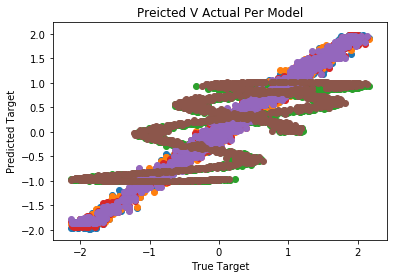

In [14]:
kf = KFold(2)
for p, (train_index, test_index) in zip(predictions, kf.split(X)):
    for m in p:
        plt.scatter(y[test_index], m)
plt.title("Preicted V Actual Per Model")
plt.xlabel("True Target")
plt.ylabel("Predicted Target")

Text(0.5, 1.0, 'Prediction by model by value of X')

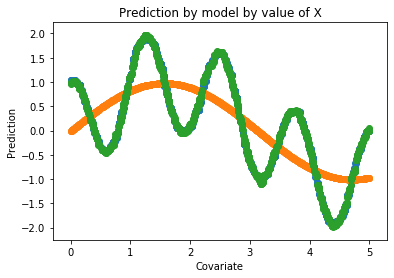

In [15]:
plt.scatter(X[:1500,0],predictions[0][1])
plt.scatter(X[:1500,0],predictions[0][2])
plt.scatter(X[:1500,0],predictions[0][0])
plt.ylabel("Prediction")
plt.xlabel("Covariate")
plt.title("Prediction by model by value of X")

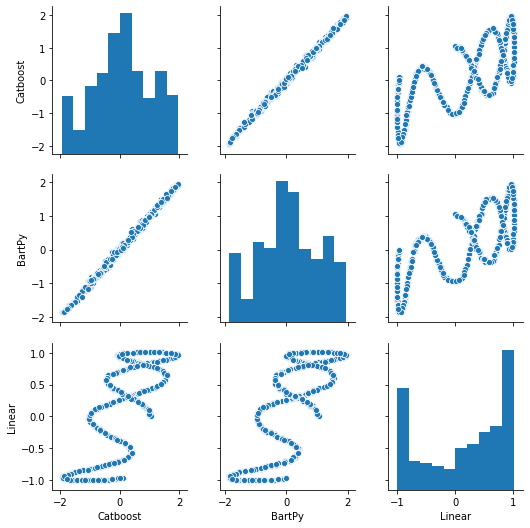

In [16]:
import seaborn as sns
p = pd.DataFrame(np.array(predictions[1]).T, columns = ["Catboost", "BartPy", "Linear"])
sns.pairplot(p)

## Single dimension - discrete break points

** To make the model more complex, let's add some discrete dumps to make the curve less smooth.  This will test the ability of the models to handle very isolated effects in feature space **

Text(0.5, 1.0, 'X v y')

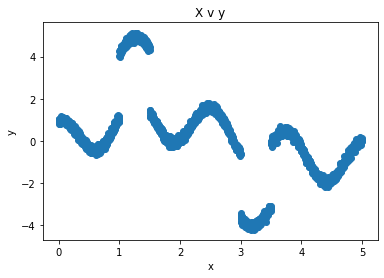

In [17]:
x = np.linspace(0, 5, 3000)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0]) + np.cos(5 * X[:, 0])
y[(X[:,0] < 1.5) & (X[:,0] > 1.)] += 3
y[(X[:,0] < 3.5) & (X[:,0] > 3.)] -= 3
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [18]:
scores, predictions, trained_models = compare_models(X, y)

0:	learn: 2.0440088	test: 1.9133633	best: 1.9133633 (0)	total: 14.9ms	remaining: 14.9s
1:	learn: 1.9979439	test: 1.8709918	best: 1.8709918 (1)	total: 24.4ms	remaining: 12.2s
2:	learn: 1.9600606	test: 1.8384715	best: 1.8384715 (2)	total: 34.6ms	remaining: 11.5s
3:	learn: 1.9143281	test: 1.7950697	best: 1.7950697 (3)	total: 47.6ms	remaining: 11.9s
4:	learn: 1.8656047	test: 1.7501829	best: 1.7501829 (4)	total: 55.9ms	remaining: 11.1s
5:	learn: 1.8204224	test: 1.7082069	best: 1.7082069 (5)	total: 63.1ms	remaining: 10.5s
6:	learn: 1.7797228	test: 1.6699626	best: 1.6699626 (6)	total: 73.7ms	remaining: 10.5s
7:	learn: 1.7420588	test: 1.6342354	best: 1.6342354 (7)	total: 84.5ms	remaining: 10.5s
8:	learn: 1.7036550	test: 1.6011061	best: 1.6011061 (8)	total: 92.6ms	remaining: 10.2s
9:	learn: 1.6620885	test: 1.5630934	best: 1.5630934 (9)	total: 100ms	remaining: 9.94s
10:	learn: 1.6247642	test: 1.5281166	best: 1.5281166 (10)	total: 112ms	remaining: 10.1s
11:	learn: 1.5875778	test: 1.4942589	best: 

112:	learn: 0.4019577	test: 0.4023945	best: 0.4023945 (112)	total: 1.02s	remaining: 8.03s
113:	learn: 0.3999922	test: 0.4004595	best: 0.4004595 (113)	total: 1.03s	remaining: 8.03s
114:	learn: 0.3965496	test: 0.3970635	best: 0.3970635 (114)	total: 1.04s	remaining: 8.01s
115:	learn: 0.3936343	test: 0.3939635	best: 0.3939635 (115)	total: 1.05s	remaining: 8.03s
116:	learn: 0.3913162	test: 0.3919881	best: 0.3919881 (116)	total: 1.06s	remaining: 8.03s
117:	learn: 0.3889855	test: 0.3896220	best: 0.3896220 (117)	total: 1.07s	remaining: 8.02s
118:	learn: 0.3870457	test: 0.3875913	best: 0.3875913 (118)	total: 1.08s	remaining: 8s
119:	learn: 0.3854098	test: 0.3861248	best: 0.3861248 (119)	total: 1.09s	remaining: 7.98s
120:	learn: 0.3828047	test: 0.3838615	best: 0.3838615 (120)	total: 1.1s	remaining: 7.97s
121:	learn: 0.3813698	test: 0.3822547	best: 0.3822547 (121)	total: 1.11s	remaining: 7.97s
122:	learn: 0.3798324	test: 0.3808041	best: 0.3808041 (122)	total: 1.11s	remaining: 7.96s
123:	learn: 0.

206:	learn: 0.2869773	test: 0.2866009	best: 0.2866009 (206)	total: 1.82s	remaining: 6.96s
207:	learn: 0.2866088	test: 0.2863080	best: 0.2863080 (207)	total: 1.82s	remaining: 6.94s
208:	learn: 0.2863895	test: 0.2860359	best: 0.2860359 (208)	total: 1.83s	remaining: 6.93s
209:	learn: 0.2856012	test: 0.2853716	best: 0.2853716 (209)	total: 1.84s	remaining: 6.93s
210:	learn: 0.2851011	test: 0.2847910	best: 0.2847910 (210)	total: 1.85s	remaining: 6.92s
211:	learn: 0.2845052	test: 0.2840667	best: 0.2840667 (211)	total: 1.86s	remaining: 6.91s
212:	learn: 0.2840540	test: 0.2834145	best: 0.2834145 (212)	total: 1.87s	remaining: 6.9s
213:	learn: 0.2835992	test: 0.2829997	best: 0.2829997 (213)	total: 1.88s	remaining: 6.89s
214:	learn: 0.2831031	test: 0.2824425	best: 0.2824425 (214)	total: 1.89s	remaining: 6.88s
215:	learn: 0.2824354	test: 0.2818073	best: 0.2818073 (215)	total: 1.89s	remaining: 6.88s
216:	learn: 0.2818857	test: 0.2812486	best: 0.2812486 (216)	total: 1.9s	remaining: 6.87s
217:	learn: 

317:	learn: 0.2520389	test: 0.2519140	best: 0.2519140 (317)	total: 2.81s	remaining: 6.02s
318:	learn: 0.2517685	test: 0.2515844	best: 0.2515844 (318)	total: 2.82s	remaining: 6.01s
319:	learn: 0.2516118	test: 0.2514125	best: 0.2514125 (319)	total: 2.83s	remaining: 6.01s
320:	learn: 0.2514828	test: 0.2512703	best: 0.2512703 (320)	total: 2.84s	remaining: 6s
321:	learn: 0.2514689	test: 0.2512508	best: 0.2512508 (321)	total: 2.84s	remaining: 5.99s
322:	learn: 0.2513313	test: 0.2511251	best: 0.2511251 (322)	total: 2.85s	remaining: 5.98s
323:	learn: 0.2512098	test: 0.2509738	best: 0.2509738 (323)	total: 2.86s	remaining: 5.98s
324:	learn: 0.2510826	test: 0.2507876	best: 0.2507876 (324)	total: 2.87s	remaining: 5.96s
325:	learn: 0.2508834	test: 0.2505476	best: 0.2505476 (325)	total: 2.88s	remaining: 5.95s
326:	learn: 0.2507751	test: 0.2505859	best: 0.2505476 (325)	total: 2.89s	remaining: 5.94s
327:	learn: 0.2504995	test: 0.2503510	best: 0.2503510 (327)	total: 2.89s	remaining: 5.93s
328:	learn: 0

413:	learn: 0.2415801	test: 0.2394949	best: 0.2394949 (413)	total: 3.6s	remaining: 5.1s
414:	learn: 0.2415764	test: 0.2394875	best: 0.2394875 (414)	total: 3.61s	remaining: 5.09s
415:	learn: 0.2415723	test: 0.2394779	best: 0.2394779 (415)	total: 3.62s	remaining: 5.08s
416:	learn: 0.2415684	test: 0.2394726	best: 0.2394726 (416)	total: 3.63s	remaining: 5.07s
417:	learn: 0.2415537	test: 0.2394408	best: 0.2394408 (417)	total: 3.63s	remaining: 5.06s
418:	learn: 0.2414837	test: 0.2393275	best: 0.2393275 (418)	total: 3.64s	remaining: 5.05s
419:	learn: 0.2414747	test: 0.2393175	best: 0.2393175 (419)	total: 3.65s	remaining: 5.04s
420:	learn: 0.2414650	test: 0.2392716	best: 0.2392716 (420)	total: 3.66s	remaining: 5.03s
421:	learn: 0.2414178	test: 0.2391875	best: 0.2391875 (421)	total: 3.67s	remaining: 5.02s
422:	learn: 0.2413958	test: 0.2391550	best: 0.2391550 (422)	total: 3.68s	remaining: 5.02s
423:	learn: 0.2413577	test: 0.2390072	best: 0.2390072 (423)	total: 3.69s	remaining: 5.01s
424:	learn: 

507:	learn: 0.2344115	test: 0.2318343	best: 0.2318343 (507)	total: 4.4s	remaining: 4.26s
508:	learn: 0.2343712	test: 0.2318438	best: 0.2318343 (507)	total: 4.41s	remaining: 4.25s
509:	learn: 0.2342831	test: 0.2317272	best: 0.2317272 (509)	total: 4.42s	remaining: 4.25s
510:	learn: 0.2341207	test: 0.2316776	best: 0.2316776 (510)	total: 4.43s	remaining: 4.24s
511:	learn: 0.2341054	test: 0.2316561	best: 0.2316561 (511)	total: 4.44s	remaining: 4.23s
512:	learn: 0.2340993	test: 0.2316289	best: 0.2316289 (512)	total: 4.45s	remaining: 4.22s
513:	learn: 0.2340519	test: 0.2316074	best: 0.2316074 (513)	total: 4.45s	remaining: 4.21s
514:	learn: 0.2340467	test: 0.2315865	best: 0.2315865 (514)	total: 4.46s	remaining: 4.2s
515:	learn: 0.2340044	test: 0.2315378	best: 0.2315378 (515)	total: 4.47s	remaining: 4.2s
516:	learn: 0.2339989	test: 0.2315163	best: 0.2315163 (516)	total: 4.48s	remaining: 4.19s
517:	learn: 0.2339474	test: 0.2314798	best: 0.2314798 (517)	total: 4.49s	remaining: 4.18s
518:	learn: 0

599:	learn: 0.2303292	test: 0.2277542	best: 0.2277542 (599)	total: 5.19s	remaining: 3.46s
600:	learn: 0.2303053	test: 0.2276796	best: 0.2276796 (600)	total: 5.19s	remaining: 3.45s
601:	learn: 0.2302561	test: 0.2276403	best: 0.2276403 (601)	total: 5.2s	remaining: 3.44s
602:	learn: 0.2302313	test: 0.2276933	best: 0.2276403 (601)	total: 5.21s	remaining: 3.43s
603:	learn: 0.2302157	test: 0.2276046	best: 0.2276046 (603)	total: 5.22s	remaining: 3.42s
604:	learn: 0.2302123	test: 0.2276018	best: 0.2276018 (604)	total: 5.23s	remaining: 3.41s
605:	learn: 0.2300991	test: 0.2274599	best: 0.2274599 (605)	total: 5.24s	remaining: 3.41s
606:	learn: 0.2300835	test: 0.2274009	best: 0.2274009 (606)	total: 5.25s	remaining: 3.4s
607:	learn: 0.2300498	test: 0.2273516	best: 0.2273516 (607)	total: 5.26s	remaining: 3.39s
608:	learn: 0.2300462	test: 0.2273559	best: 0.2273516 (607)	total: 5.27s	remaining: 3.38s
609:	learn: 0.2300115	test: 0.2273217	best: 0.2273217 (609)	total: 5.27s	remaining: 3.37s
610:	learn: 

693:	learn: 0.2281352	test: 0.2250892	best: 0.2250802 (692)	total: 5.98s	remaining: 2.64s
694:	learn: 0.2281109	test: 0.2250771	best: 0.2250771 (694)	total: 5.99s	remaining: 2.63s
695:	learn: 0.2280919	test: 0.2250526	best: 0.2250526 (695)	total: 6s	remaining: 2.62s
696:	learn: 0.2280894	test: 0.2250573	best: 0.2250526 (695)	total: 6.01s	remaining: 2.61s
697:	learn: 0.2280531	test: 0.2250641	best: 0.2250526 (695)	total: 6.01s	remaining: 2.6s
698:	learn: 0.2280317	test: 0.2250500	best: 0.2250500 (698)	total: 6.03s	remaining: 2.59s
699:	learn: 0.2280147	test: 0.2250313	best: 0.2250313 (699)	total: 6.04s	remaining: 2.59s
700:	learn: 0.2280008	test: 0.2250264	best: 0.2250264 (700)	total: 6.04s	remaining: 2.58s
701:	learn: 0.2279928	test: 0.2250368	best: 0.2250264 (700)	total: 6.05s	remaining: 2.57s
702:	learn: 0.2279783	test: 0.2249765	best: 0.2249765 (702)	total: 6.06s	remaining: 2.56s
703:	learn: 0.2279658	test: 0.2249089	best: 0.2249089 (703)	total: 6.07s	remaining: 2.55s
704:	learn: 0.

809:	learn: 0.2254292	test: 0.2224984	best: 0.2224476 (806)	total: 6.98s	remaining: 1.64s
810:	learn: 0.2254228	test: 0.2224887	best: 0.2224476 (806)	total: 6.99s	remaining: 1.63s
811:	learn: 0.2253806	test: 0.2225172	best: 0.2224476 (806)	total: 6.99s	remaining: 1.62s
812:	learn: 0.2253786	test: 0.2225122	best: 0.2224476 (806)	total: 7s	remaining: 1.61s
813:	learn: 0.2252490	test: 0.2224275	best: 0.2224275 (813)	total: 7.01s	remaining: 1.6s
814:	learn: 0.2252328	test: 0.2224081	best: 0.2224081 (814)	total: 7.02s	remaining: 1.59s
815:	learn: 0.2251708	test: 0.2223180	best: 0.2223180 (815)	total: 7.02s	remaining: 1.58s
816:	learn: 0.2251535	test: 0.2223053	best: 0.2223053 (816)	total: 7.03s	remaining: 1.57s
817:	learn: 0.2251450	test: 0.2223319	best: 0.2223053 (816)	total: 7.04s	remaining: 1.57s
818:	learn: 0.2251024	test: 0.2224113	best: 0.2223053 (816)	total: 7.05s	remaining: 1.56s
819:	learn: 0.2250947	test: 0.2224027	best: 0.2223053 (816)	total: 7.06s	remaining: 1.55s
820:	learn: 0.

922:	learn: 0.2242598	test: 0.2219993	best: 0.2219993 (922)	total: 7.96s	remaining: 664ms
923:	learn: 0.2242524	test: 0.2220052	best: 0.2219993 (922)	total: 7.97s	remaining: 656ms
924:	learn: 0.2242477	test: 0.2220017	best: 0.2219993 (922)	total: 7.98s	remaining: 647ms
925:	learn: 0.2242381	test: 0.2220025	best: 0.2219993 (922)	total: 7.99s	remaining: 638ms
926:	learn: 0.2241842	test: 0.2219488	best: 0.2219488 (926)	total: 7.99s	remaining: 630ms
927:	learn: 0.2241733	test: 0.2219471	best: 0.2219471 (927)	total: 8s	remaining: 621ms
928:	learn: 0.2241703	test: 0.2219413	best: 0.2219413 (928)	total: 8.02s	remaining: 613ms
929:	learn: 0.2241701	test: 0.2219392	best: 0.2219392 (929)	total: 8.02s	remaining: 604ms
930:	learn: 0.2241637	test: 0.2219199	best: 0.2219199 (930)	total: 8.04s	remaining: 596ms
931:	learn: 0.2241601	test: 0.2219193	best: 0.2219193 (931)	total: 8.04s	remaining: 587ms
932:	learn: 0.2241403	test: 0.2218533	best: 0.2218533 (932)	total: 8.05s	remaining: 578ms
933:	learn: 0

20:	learn: 1.2793375	test: 1.4027081	best: 1.4027081 (20)	total: 217ms	remaining: 10.1s
21:	learn: 1.2589461	test: 1.3801980	best: 1.3801980 (21)	total: 225ms	remaining: 9.99s
22:	learn: 1.2392793	test: 1.3594393	best: 1.3594393 (22)	total: 235ms	remaining: 9.98s
23:	learn: 1.2116813	test: 1.3282105	best: 1.3282105 (23)	total: 244ms	remaining: 9.91s
24:	learn: 1.1877406	test: 1.3007222	best: 1.3007222 (24)	total: 253ms	remaining: 9.87s
25:	learn: 1.1676610	test: 1.2784115	best: 1.2784115 (25)	total: 261ms	remaining: 9.78s
26:	learn: 1.1428467	test: 1.2507045	best: 1.2507045 (26)	total: 272ms	remaining: 9.79s
27:	learn: 1.1200092	test: 1.2262088	best: 1.2262088 (27)	total: 279ms	remaining: 9.7s
28:	learn: 1.0987063	test: 1.2035578	best: 1.2035578 (28)	total: 288ms	remaining: 9.65s
29:	learn: 1.0775304	test: 1.1812414	best: 1.1812414 (29)	total: 295ms	remaining: 9.53s
30:	learn: 1.0558375	test: 1.1560740	best: 1.1560740 (30)	total: 302ms	remaining: 9.43s
31:	learn: 1.0399033	test: 1.1377

115:	learn: 0.4141950	test: 0.4299372	best: 0.4299372 (115)	total: 999ms	remaining: 7.62s
116:	learn: 0.4114168	test: 0.4267066	best: 0.4267066 (116)	total: 1.01s	remaining: 7.62s
117:	learn: 0.4089421	test: 0.4242052	best: 0.4242052 (117)	total: 1.02s	remaining: 7.6s
118:	learn: 0.4060404	test: 0.4202016	best: 0.4202016 (118)	total: 1.02s	remaining: 7.59s
119:	learn: 0.4037496	test: 0.4177528	best: 0.4177528 (119)	total: 1.03s	remaining: 7.59s
120:	learn: 0.4004462	test: 0.4142743	best: 0.4142743 (120)	total: 1.04s	remaining: 7.57s
121:	learn: 0.3987985	test: 0.4123348	best: 0.4123348 (121)	total: 1.05s	remaining: 7.56s
122:	learn: 0.3959601	test: 0.4093914	best: 0.4093914 (122)	total: 1.06s	remaining: 7.55s
123:	learn: 0.3935590	test: 0.4071024	best: 0.4071024 (123)	total: 1.07s	remaining: 7.55s
124:	learn: 0.3913544	test: 0.4043719	best: 0.4043719 (124)	total: 1.07s	remaining: 7.53s
125:	learn: 0.3894378	test: 0.4019480	best: 0.4019480 (125)	total: 1.08s	remaining: 7.53s
126:	learn:

208:	learn: 0.2992800	test: 0.3022235	best: 0.3022235 (208)	total: 1.79s	remaining: 6.79s
209:	learn: 0.2987826	test: 0.3020715	best: 0.3020715 (209)	total: 1.8s	remaining: 6.79s
210:	learn: 0.2976596	test: 0.3010102	best: 0.3010102 (210)	total: 1.81s	remaining: 6.78s
211:	learn: 0.2976543	test: 0.3009979	best: 0.3009979 (211)	total: 1.82s	remaining: 6.77s
212:	learn: 0.2976110	test: 0.3009432	best: 0.3009432 (212)	total: 1.83s	remaining: 6.75s
213:	learn: 0.2975331	test: 0.3008423	best: 0.3008423 (213)	total: 1.84s	remaining: 6.75s
214:	learn: 0.2974030	test: 0.3007313	best: 0.3007313 (214)	total: 1.85s	remaining: 6.74s
215:	learn: 0.2970220	test: 0.3000315	best: 0.3000315 (215)	total: 1.85s	remaining: 6.73s
216:	learn: 0.2965162	test: 0.2991838	best: 0.2991838 (216)	total: 1.86s	remaining: 6.71s
217:	learn: 0.2958845	test: 0.2984577	best: 0.2984577 (217)	total: 1.87s	remaining: 6.71s
218:	learn: 0.2950340	test: 0.2975649	best: 0.2975649 (218)	total: 1.88s	remaining: 6.69s
219:	learn:

304:	learn: 0.2661186	test: 0.2665987	best: 0.2665987 (304)	total: 2.58s	remaining: 5.89s
305:	learn: 0.2660995	test: 0.2665870	best: 0.2665870 (305)	total: 2.59s	remaining: 5.88s
306:	learn: 0.2660932	test: 0.2666159	best: 0.2665870 (305)	total: 2.6s	remaining: 5.87s
307:	learn: 0.2660692	test: 0.2666039	best: 0.2665870 (305)	total: 2.61s	remaining: 5.86s
308:	learn: 0.2655628	test: 0.2660896	best: 0.2660896 (308)	total: 2.62s	remaining: 5.86s
309:	learn: 0.2655601	test: 0.2660766	best: 0.2660766 (309)	total: 2.63s	remaining: 5.84s
310:	learn: 0.2655560	test: 0.2660754	best: 0.2660754 (310)	total: 2.63s	remaining: 5.84s
311:	learn: 0.2655427	test: 0.2660809	best: 0.2660754 (310)	total: 2.64s	remaining: 5.83s
312:	learn: 0.2653977	test: 0.2658611	best: 0.2658611 (312)	total: 2.65s	remaining: 5.82s
313:	learn: 0.2653909	test: 0.2658553	best: 0.2658553 (313)	total: 2.66s	remaining: 5.81s
314:	learn: 0.2650192	test: 0.2654934	best: 0.2654934 (314)	total: 2.67s	remaining: 5.8s
315:	learn: 

397:	learn: 0.2486419	test: 0.2443196	best: 0.2443196 (397)	total: 3.37s	remaining: 5.1s
398:	learn: 0.2481276	test: 0.2439285	best: 0.2439285 (398)	total: 3.38s	remaining: 5.09s
399:	learn: 0.2477421	test: 0.2435558	best: 0.2435558 (399)	total: 3.39s	remaining: 5.08s
400:	learn: 0.2477321	test: 0.2435323	best: 0.2435323 (400)	total: 3.39s	remaining: 5.07s
401:	learn: 0.2477213	test: 0.2435180	best: 0.2435180 (401)	total: 3.4s	remaining: 5.06s
402:	learn: 0.2475765	test: 0.2433176	best: 0.2433176 (402)	total: 3.41s	remaining: 5.05s
403:	learn: 0.2474025	test: 0.2431384	best: 0.2431384 (403)	total: 3.42s	remaining: 5.04s
404:	learn: 0.2471739	test: 0.2431878	best: 0.2431384 (403)	total: 3.43s	remaining: 5.04s
405:	learn: 0.2471647	test: 0.2431675	best: 0.2431384 (403)	total: 3.44s	remaining: 5.03s
406:	learn: 0.2471609	test: 0.2431466	best: 0.2431384 (403)	total: 3.45s	remaining: 5.02s
407:	learn: 0.2469258	test: 0.2429554	best: 0.2429554 (407)	total: 3.46s	remaining: 5.01s
408:	learn: 

510:	learn: 0.2368627	test: 0.2312449	best: 0.2312449 (510)	total: 4.37s	remaining: 4.18s
511:	learn: 0.2368512	test: 0.2312198	best: 0.2312198 (511)	total: 4.38s	remaining: 4.17s
512:	learn: 0.2368447	test: 0.2312045	best: 0.2312045 (512)	total: 4.38s	remaining: 4.16s
513:	learn: 0.2366977	test: 0.2308632	best: 0.2308632 (513)	total: 4.39s	remaining: 4.15s
514:	learn: 0.2366646	test: 0.2306389	best: 0.2306389 (514)	total: 4.4s	remaining: 4.14s
515:	learn: 0.2366313	test: 0.2305889	best: 0.2305889 (515)	total: 4.41s	remaining: 4.13s
516:	learn: 0.2366282	test: 0.2305809	best: 0.2305809 (516)	total: 4.42s	remaining: 4.13s
517:	learn: 0.2366219	test: 0.2305749	best: 0.2305749 (517)	total: 4.42s	remaining: 4.12s
518:	learn: 0.2365864	test: 0.2305533	best: 0.2305533 (518)	total: 4.43s	remaining: 4.11s
519:	learn: 0.2365773	test: 0.2305545	best: 0.2305533 (518)	total: 4.44s	remaining: 4.1s
520:	learn: 0.2365746	test: 0.2305438	best: 0.2305438 (520)	total: 4.45s	remaining: 4.09s
521:	learn: 

605:	learn: 0.2323206	test: 0.2255090	best: 0.2255090 (605)	total: 5.17s	remaining: 3.36s
606:	learn: 0.2322845	test: 0.2254915	best: 0.2254915 (606)	total: 5.17s	remaining: 3.35s
607:	learn: 0.2320449	test: 0.2253023	best: 0.2253023 (607)	total: 5.18s	remaining: 3.34s
608:	learn: 0.2320406	test: 0.2252964	best: 0.2252964 (608)	total: 5.19s	remaining: 3.33s
609:	learn: 0.2319857	test: 0.2250926	best: 0.2250926 (609)	total: 5.2s	remaining: 3.33s
610:	learn: 0.2319652	test: 0.2249295	best: 0.2249295 (610)	total: 5.21s	remaining: 3.32s
611:	learn: 0.2319614	test: 0.2249269	best: 0.2249269 (611)	total: 5.22s	remaining: 3.31s
612:	learn: 0.2319564	test: 0.2249212	best: 0.2249212 (612)	total: 5.23s	remaining: 3.3s
613:	learn: 0.2319386	test: 0.2248920	best: 0.2248920 (613)	total: 5.24s	remaining: 3.29s
614:	learn: 0.2319320	test: 0.2248856	best: 0.2248856 (614)	total: 5.25s	remaining: 3.28s
615:	learn: 0.2319081	test: 0.2248361	best: 0.2248361 (615)	total: 5.25s	remaining: 3.27s
616:	learn: 

697:	learn: 0.2282331	test: 0.2205589	best: 0.2205589 (697)	total: 5.95s	remaining: 2.58s
698:	learn: 0.2281925	test: 0.2205518	best: 0.2205518 (698)	total: 5.96s	remaining: 2.57s
699:	learn: 0.2281898	test: 0.2205537	best: 0.2205518 (698)	total: 5.97s	remaining: 2.56s
700:	learn: 0.2281897	test: 0.2205535	best: 0.2205518 (698)	total: 5.99s	remaining: 2.55s
701:	learn: 0.2281698	test: 0.2205438	best: 0.2205438 (701)	total: 6s	remaining: 2.55s
702:	learn: 0.2281667	test: 0.2205415	best: 0.2205415 (702)	total: 6.01s	remaining: 2.54s
703:	learn: 0.2280746	test: 0.2205044	best: 0.2205044 (703)	total: 6.02s	remaining: 2.53s
704:	learn: 0.2280610	test: 0.2203853	best: 0.2203853 (704)	total: 6.03s	remaining: 2.52s
705:	learn: 0.2280485	test: 0.2202664	best: 0.2202664 (705)	total: 6.04s	remaining: 2.51s
706:	learn: 0.2280478	test: 0.2202694	best: 0.2202664 (705)	total: 6.05s	remaining: 2.51s
707:	learn: 0.2278316	test: 0.2202853	best: 0.2202664 (705)	total: 6.05s	remaining: 2.5s
708:	learn: 0.

812:	learn: 0.2244794	test: 0.2172099	best: 0.2171413 (809)	total: 6.95s	remaining: 1.6s
813:	learn: 0.2244710	test: 0.2171241	best: 0.2171241 (813)	total: 6.96s	remaining: 1.59s
814:	learn: 0.2244556	test: 0.2170304	best: 0.2170304 (814)	total: 6.97s	remaining: 1.58s
815:	learn: 0.2244494	test: 0.2170149	best: 0.2170149 (815)	total: 6.98s	remaining: 1.57s
816:	learn: 0.2243407	test: 0.2169817	best: 0.2169817 (816)	total: 6.99s	remaining: 1.56s
817:	learn: 0.2241763	test: 0.2168653	best: 0.2168653 (817)	total: 7s	remaining: 1.56s
818:	learn: 0.2241660	test: 0.2168548	best: 0.2168548 (818)	total: 7s	remaining: 1.55s
819:	learn: 0.2241658	test: 0.2168528	best: 0.2168528 (819)	total: 7.01s	remaining: 1.54s
820:	learn: 0.2241637	test: 0.2168532	best: 0.2168528 (819)	total: 7.02s	remaining: 1.53s
821:	learn: 0.2241629	test: 0.2168519	best: 0.2168519 (821)	total: 7.03s	remaining: 1.52s
822:	learn: 0.2240132	test: 0.2167931	best: 0.2167931 (822)	total: 7.04s	remaining: 1.51s
823:	learn: 0.224

906:	learn: 0.2229104	test: 0.2155444	best: 0.2155444 (906)	total: 7.74s	remaining: 794ms
907:	learn: 0.2229101	test: 0.2155467	best: 0.2155444 (906)	total: 7.75s	remaining: 785ms
908:	learn: 0.2229084	test: 0.2155403	best: 0.2155403 (908)	total: 7.76s	remaining: 776ms
909:	learn: 0.2229046	test: 0.2155390	best: 0.2155390 (909)	total: 7.76s	remaining: 768ms
910:	learn: 0.2229043	test: 0.2155414	best: 0.2155390 (909)	total: 7.77s	remaining: 759ms
911:	learn: 0.2229036	test: 0.2155359	best: 0.2155359 (911)	total: 7.78s	remaining: 751ms
912:	learn: 0.2228979	test: 0.2155356	best: 0.2155356 (912)	total: 7.79s	remaining: 743ms
913:	learn: 0.2228968	test: 0.2155386	best: 0.2155356 (912)	total: 7.8s	remaining: 734ms
914:	learn: 0.2228965	test: 0.2155408	best: 0.2155356 (912)	total: 7.81s	remaining: 726ms
915:	learn: 0.2228953	test: 0.2155399	best: 0.2155356 (912)	total: 7.82s	remaining: 717ms
916:	learn: 0.2228869	test: 0.2154840	best: 0.2154840 (916)	total: 7.83s	remaining: 709ms
917:	learn:

In [19]:
scores

[[0.9913776598724658, 0.9869781136467, 0.32027136194839473],
 [0.9901572752041097, 0.9872461089867663, 0.2936448453836874]]

Text(0, 0.5, 'Predicted Target')

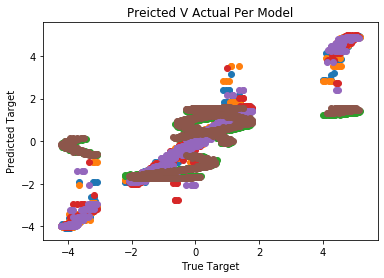

In [20]:
kf = KFold(2)
for p, (train_index, test_index) in zip(predictions, kf.split(X)):
    for m in p:
        plt.scatter(y[test_index], m)
plt.title("Preicted V Actual Per Model")
plt.xlabel("True Target")
plt.ylabel("Predicted Target")

Text(0.5, 1.0, 'Prediction by model by value of X')

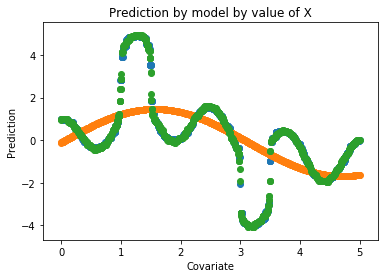

In [21]:
plt.scatter(X[:1500,0],predictions[0][1])
plt.scatter(X[:1500,0],predictions[0][2])
plt.scatter(X[:1500,0],predictions[0][0])
plt.ylabel("Prediction")
plt.xlabel("Covariate")
plt.title("Prediction by model by value of X")

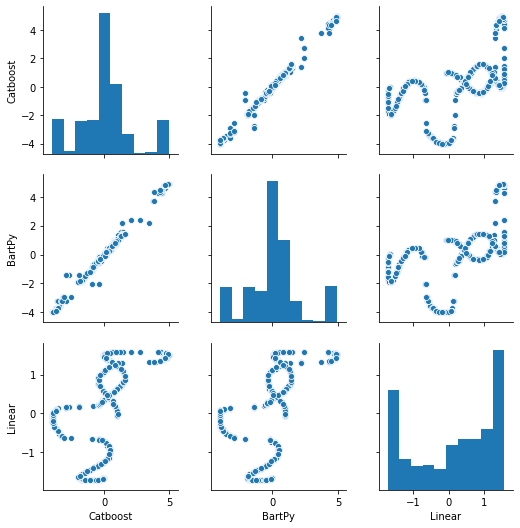

In [22]:
import seaborn as sns
p = pd.DataFrame(np.array(predictions[1]).T, columns = ["Catboost", "BartPy", "Linear"])
sns.pairplot(p)

# Single meaningful dimension - additional noise dimensions

** It's important for the models to be able to correctly identify features that aren't important.  In this case, we just add normally distributed noise features.  This shouldn't be too difficult a problem to solve **

Text(0.5, 1.0, 'X v y')

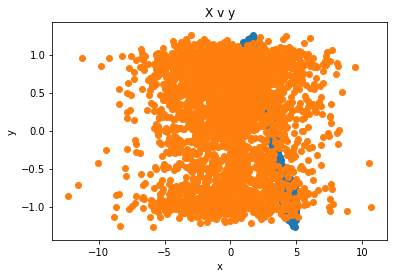

In [23]:
x = np.linspace(0, 5, 3000)
X = np.random.normal(0, 3, size = 3000 * 8).reshape(3000, 8)
X[:, 0] = x
X = pd.DataFrame(X).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0])
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 1], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [24]:
scores, predictions, trained_models = compare_models(X, y)

0:	learn: 0.7091287	test: 0.7064791	best: 0.7064791 (0)	total: 17.5ms	remaining: 17.5s
1:	learn: 0.6910725	test: 0.6888223	best: 0.6888223 (1)	total: 31.4ms	remaining: 15.7s
2:	learn: 0.6741567	test: 0.6722752	best: 0.6722752 (2)	total: 46.6ms	remaining: 15.5s
3:	learn: 0.6569650	test: 0.6550679	best: 0.6550679 (3)	total: 55.9ms	remaining: 13.9s
4:	learn: 0.6421182	test: 0.6405625	best: 0.6405625 (4)	total: 65.5ms	remaining: 13s
5:	learn: 0.6275985	test: 0.6262168	best: 0.6262168 (5)	total: 75.8ms	remaining: 12.6s
6:	learn: 0.6106194	test: 0.6092911	best: 0.6092911 (6)	total: 85.2ms	remaining: 12.1s
7:	learn: 0.5955188	test: 0.5940872	best: 0.5940872 (7)	total: 98.4ms	remaining: 12.2s
8:	learn: 0.5802894	test: 0.5791720	best: 0.5791720 (8)	total: 107ms	remaining: 11.8s
9:	learn: 0.5657743	test: 0.5645513	best: 0.5645513 (9)	total: 118ms	remaining: 11.7s
10:	learn: 0.5527351	test: 0.5516350	best: 0.5516350 (10)	total: 125ms	remaining: 11.3s
11:	learn: 0.5385509	test: 0.5372367	best: 0.5

101:	learn: 0.1165518	test: 0.1190572	best: 0.1190572 (101)	total: 1.02s	remaining: 8.95s
102:	learn: 0.1160229	test: 0.1186502	best: 0.1186502 (102)	total: 1.03s	remaining: 8.96s
103:	learn: 0.1155733	test: 0.1183209	best: 0.1183209 (103)	total: 1.04s	remaining: 8.93s
104:	learn: 0.1148642	test: 0.1176702	best: 0.1176702 (104)	total: 1.04s	remaining: 8.91s
105:	learn: 0.1144528	test: 0.1173912	best: 0.1173912 (105)	total: 1.05s	remaining: 8.88s
106:	learn: 0.1136866	test: 0.1167211	best: 0.1167211 (106)	total: 1.06s	remaining: 8.87s
107:	learn: 0.1130034	test: 0.1161653	best: 0.1161653 (107)	total: 1.07s	remaining: 8.88s
108:	learn: 0.1126782	test: 0.1158622	best: 0.1158622 (108)	total: 1.08s	remaining: 8.87s
109:	learn: 0.1121490	test: 0.1153597	best: 0.1153597 (109)	total: 1.09s	remaining: 8.84s
110:	learn: 0.1115137	test: 0.1147892	best: 0.1147892 (110)	total: 1.1s	remaining: 8.84s
111:	learn: 0.1107783	test: 0.1142169	best: 0.1142169 (111)	total: 1.11s	remaining: 8.83s
112:	learn:

203:	learn: 0.0962673	test: 0.1041657	best: 0.1041620 (202)	total: 2.01s	remaining: 7.86s
204:	learn: 0.0962209	test: 0.1041461	best: 0.1041461 (204)	total: 2.02s	remaining: 7.84s
205:	learn: 0.0961602	test: 0.1041002	best: 0.1041002 (205)	total: 2.03s	remaining: 7.83s
206:	learn: 0.0961089	test: 0.1040553	best: 0.1040553 (206)	total: 2.04s	remaining: 7.82s
207:	learn: 0.0960500	test: 0.1040209	best: 0.1040209 (207)	total: 2.05s	remaining: 7.8s
208:	learn: 0.0960330	test: 0.1040308	best: 0.1040209 (207)	total: 2.06s	remaining: 7.8s
209:	learn: 0.0959973	test: 0.1040227	best: 0.1040209 (207)	total: 2.07s	remaining: 7.78s
210:	learn: 0.0959334	test: 0.1040243	best: 0.1040209 (207)	total: 2.08s	remaining: 7.78s
211:	learn: 0.0959157	test: 0.1040337	best: 0.1040209 (207)	total: 2.09s	remaining: 7.76s
212:	learn: 0.0958998	test: 0.1040402	best: 0.1040209 (207)	total: 2.1s	remaining: 7.75s
213:	learn: 0.0958843	test: 0.1040447	best: 0.1040209 (207)	total: 2.11s	remaining: 7.74s
214:	learn: 0

306:	learn: 0.0928701	test: 0.1031574	best: 0.1031440 (302)	total: 3.01s	remaining: 6.8s
307:	learn: 0.0928573	test: 0.1031646	best: 0.1031440 (302)	total: 3.02s	remaining: 6.79s
308:	learn: 0.0928067	test: 0.1031512	best: 0.1031440 (302)	total: 3.03s	remaining: 6.78s
309:	learn: 0.0927915	test: 0.1031586	best: 0.1031440 (302)	total: 3.04s	remaining: 6.77s
310:	learn: 0.0927823	test: 0.1031554	best: 0.1031440 (302)	total: 3.05s	remaining: 6.76s
311:	learn: 0.0927674	test: 0.1031550	best: 0.1031440 (302)	total: 3.06s	remaining: 6.75s
312:	learn: 0.0927513	test: 0.1031508	best: 0.1031440 (302)	total: 3.07s	remaining: 6.74s
313:	learn: 0.0927407	test: 0.1031616	best: 0.1031440 (302)	total: 3.08s	remaining: 6.73s
314:	learn: 0.0927299	test: 0.1031612	best: 0.1031440 (302)	total: 3.09s	remaining: 6.73s
315:	learn: 0.0927006	test: 0.1031811	best: 0.1031440 (302)	total: 3.1s	remaining: 6.71s
316:	learn: 0.0926721	test: 0.1031591	best: 0.1031440 (302)	total: 3.11s	remaining: 6.7s
317:	learn: 0

407:	learn: 0.0898936	test: 0.1024742	best: 0.1024742 (407)	total: 4.01s	remaining: 5.81s
408:	learn: 0.0898566	test: 0.1024696	best: 0.1024696 (408)	total: 4.01s	remaining: 5.8s
409:	learn: 0.0898002	test: 0.1024710	best: 0.1024696 (408)	total: 4.02s	remaining: 5.79s
410:	learn: 0.0897758	test: 0.1024597	best: 0.1024597 (410)	total: 4.03s	remaining: 5.78s
411:	learn: 0.0897378	test: 0.1024764	best: 0.1024597 (410)	total: 4.04s	remaining: 5.77s
412:	learn: 0.0897034	test: 0.1024497	best: 0.1024497 (412)	total: 4.05s	remaining: 5.76s
413:	learn: 0.0896779	test: 0.1024513	best: 0.1024497 (412)	total: 4.06s	remaining: 5.75s
414:	learn: 0.0896634	test: 0.1024552	best: 0.1024497 (412)	total: 4.07s	remaining: 5.74s
415:	learn: 0.0896469	test: 0.1024569	best: 0.1024497 (412)	total: 4.08s	remaining: 5.73s
416:	learn: 0.0896207	test: 0.1024656	best: 0.1024497 (412)	total: 4.09s	remaining: 5.72s
417:	learn: 0.0895793	test: 0.1024712	best: 0.1024497 (412)	total: 4.1s	remaining: 5.71s
418:	learn: 

510:	learn: 0.0867269	test: 0.1021064	best: 0.1020919 (507)	total: 5.01s	remaining: 4.8s
511:	learn: 0.0867050	test: 0.1021085	best: 0.1020919 (507)	total: 5.02s	remaining: 4.79s
512:	learn: 0.0866848	test: 0.1021152	best: 0.1020919 (507)	total: 5.03s	remaining: 4.78s
513:	learn: 0.0866575	test: 0.1021226	best: 0.1020919 (507)	total: 5.04s	remaining: 4.77s
514:	learn: 0.0865948	test: 0.1021276	best: 0.1020919 (507)	total: 5.06s	remaining: 4.76s
515:	learn: 0.0865720	test: 0.1021061	best: 0.1020919 (507)	total: 5.06s	remaining: 4.75s
516:	learn: 0.0865620	test: 0.1020997	best: 0.1020919 (507)	total: 5.07s	remaining: 4.74s
517:	learn: 0.0864952	test: 0.1021146	best: 0.1020919 (507)	total: 5.08s	remaining: 4.73s
518:	learn: 0.0864612	test: 0.1021179	best: 0.1020919 (507)	total: 5.09s	remaining: 4.72s
519:	learn: 0.0864289	test: 0.1021287	best: 0.1020919 (507)	total: 5.1s	remaining: 4.71s
520:	learn: 0.0864148	test: 0.1021388	best: 0.1020919 (507)	total: 5.11s	remaining: 4.7s
521:	learn: 0

604:	learn: 0.0840368	test: 0.1019771	best: 0.1019582 (597)	total: 6.02s	remaining: 3.93s
605:	learn: 0.0840122	test: 0.1019825	best: 0.1019582 (597)	total: 6.03s	remaining: 3.92s
606:	learn: 0.0839889	test: 0.1019871	best: 0.1019582 (597)	total: 6.04s	remaining: 3.91s
607:	learn: 0.0839807	test: 0.1019918	best: 0.1019582 (597)	total: 6.05s	remaining: 3.9s
608:	learn: 0.0839584	test: 0.1019970	best: 0.1019582 (597)	total: 6.06s	remaining: 3.89s
609:	learn: 0.0839099	test: 0.1019920	best: 0.1019582 (597)	total: 6.07s	remaining: 3.88s
610:	learn: 0.0838936	test: 0.1019732	best: 0.1019582 (597)	total: 6.08s	remaining: 3.87s
611:	learn: 0.0838742	test: 0.1019682	best: 0.1019582 (597)	total: 6.09s	remaining: 3.86s
612:	learn: 0.0838581	test: 0.1019680	best: 0.1019582 (597)	total: 6.1s	remaining: 3.85s
613:	learn: 0.0838341	test: 0.1019655	best: 0.1019582 (597)	total: 6.11s	remaining: 3.84s
614:	learn: 0.0838162	test: 0.1019633	best: 0.1019582 (597)	total: 6.12s	remaining: 3.83s
615:	learn: 

702:	learn: 0.0813391	test: 0.1020949	best: 0.1019314 (651)	total: 7.03s	remaining: 2.97s
703:	learn: 0.0813145	test: 0.1021001	best: 0.1019314 (651)	total: 7.04s	remaining: 2.96s
704:	learn: 0.0812736	test: 0.1021297	best: 0.1019314 (651)	total: 7.05s	remaining: 2.95s
705:	learn: 0.0812370	test: 0.1021325	best: 0.1019314 (651)	total: 7.06s	remaining: 2.94s
706:	learn: 0.0812167	test: 0.1021257	best: 0.1019314 (651)	total: 7.07s	remaining: 2.93s
707:	learn: 0.0811744	test: 0.1021213	best: 0.1019314 (651)	total: 7.08s	remaining: 2.92s
708:	learn: 0.0811351	test: 0.1021198	best: 0.1019314 (651)	total: 7.1s	remaining: 2.91s
709:	learn: 0.0811005	test: 0.1021331	best: 0.1019314 (651)	total: 7.11s	remaining: 2.9s
710:	learn: 0.0810856	test: 0.1021274	best: 0.1019314 (651)	total: 7.12s	remaining: 2.89s
711:	learn: 0.0810475	test: 0.1021350	best: 0.1019314 (651)	total: 7.12s	remaining: 2.88s
712:	learn: 0.0810322	test: 0.1021283	best: 0.1019314 (651)	total: 7.13s	remaining: 2.87s
713:	learn: 

801:	learn: 0.0789602	test: 0.1021948	best: 0.1019314 (651)	total: 8.03s	remaining: 1.98s
802:	learn: 0.0789339	test: 0.1022177	best: 0.1019314 (651)	total: 8.04s	remaining: 1.97s
803:	learn: 0.0789200	test: 0.1022187	best: 0.1019314 (651)	total: 8.05s	remaining: 1.96s
804:	learn: 0.0789127	test: 0.1022166	best: 0.1019314 (651)	total: 8.06s	remaining: 1.95s
805:	learn: 0.0788944	test: 0.1022191	best: 0.1019314 (651)	total: 8.07s	remaining: 1.94s
806:	learn: 0.0788831	test: 0.1022156	best: 0.1019314 (651)	total: 8.08s	remaining: 1.93s
807:	learn: 0.0788678	test: 0.1022197	best: 0.1019314 (651)	total: 8.09s	remaining: 1.92s
808:	learn: 0.0788598	test: 0.1022173	best: 0.1019314 (651)	total: 8.1s	remaining: 1.91s
809:	learn: 0.0788276	test: 0.1022172	best: 0.1019314 (651)	total: 8.11s	remaining: 1.9s
810:	learn: 0.0787737	test: 0.1022457	best: 0.1019314 (651)	total: 8.13s	remaining: 1.89s
811:	learn: 0.0787612	test: 0.1022450	best: 0.1019314 (651)	total: 8.14s	remaining: 1.88s
812:	learn: 

897:	learn: 0.0768029	test: 0.1023212	best: 0.1019314 (651)	total: 9.03s	remaining: 1.02s
898:	learn: 0.0767960	test: 0.1023215	best: 0.1019314 (651)	total: 9.03s	remaining: 1.01s
899:	learn: 0.0767606	test: 0.1023216	best: 0.1019314 (651)	total: 9.05s	remaining: 1s
900:	learn: 0.0767476	test: 0.1023224	best: 0.1019314 (651)	total: 9.06s	remaining: 995ms
901:	learn: 0.0767393	test: 0.1023174	best: 0.1019314 (651)	total: 9.07s	remaining: 985ms
902:	learn: 0.0766901	test: 0.1023198	best: 0.1019314 (651)	total: 9.08s	remaining: 975ms
903:	learn: 0.0766533	test: 0.1023183	best: 0.1019314 (651)	total: 9.09s	remaining: 966ms
904:	learn: 0.0766420	test: 0.1023204	best: 0.1019314 (651)	total: 9.1s	remaining: 956ms
905:	learn: 0.0766151	test: 0.1023287	best: 0.1019314 (651)	total: 9.11s	remaining: 946ms
906:	learn: 0.0766001	test: 0.1023263	best: 0.1019314 (651)	total: 9.12s	remaining: 935ms
907:	learn: 0.0765916	test: 0.1023253	best: 0.1019314 (651)	total: 9.13s	remaining: 925ms
908:	learn: 0.

996:	learn: 0.0746379	test: 0.1024027	best: 0.1019314 (651)	total: 10s	remaining: 30.2ms
997:	learn: 0.0746173	test: 0.1024177	best: 0.1019314 (651)	total: 10s	remaining: 20.1ms
998:	learn: 0.0746015	test: 0.1024197	best: 0.1019314 (651)	total: 10.1s	remaining: 10.1ms
999:	learn: 0.0745977	test: 0.1024187	best: 0.1019314 (651)	total: 10.1s	remaining: 0us

bestTest = 0.1019314428
bestIteration = 651

Shrink model to first 652 iterations.
0:	learn: 0.6881544	test: 0.6995415	best: 0.6995415 (0)	total: 25.1ms	remaining: 25.1s
1:	learn: 0.6713420	test: 0.6828187	best: 0.6828187 (1)	total: 35ms	remaining: 17.5s
2:	learn: 0.6550131	test: 0.6659776	best: 0.6659776 (2)	total: 46.9ms	remaining: 15.6s
3:	learn: 0.6382891	test: 0.6485135	best: 0.6485135 (3)	total: 57.4ms	remaining: 14.3s
4:	learn: 0.6226140	test: 0.6324527	best: 0.6324527 (4)	total: 67.8ms	remaining: 13.5s
5:	learn: 0.6087188	test: 0.6188042	best: 0.6188042 (5)	total: 77.7ms	remaining: 12.9s
6:	learn: 0.5931317	test: 0.6031046	bes

96:	learn: 0.1217343	test: 0.1251948	best: 0.1251948 (96)	total: 1.03s	remaining: 9.57s
97:	learn: 0.1211824	test: 0.1245698	best: 0.1245698 (97)	total: 1.04s	remaining: 9.58s
98:	learn: 0.1204343	test: 0.1238518	best: 0.1238518 (98)	total: 1.05s	remaining: 9.59s
99:	learn: 0.1196997	test: 0.1231062	best: 0.1231062 (99)	total: 1.06s	remaining: 9.55s
100:	learn: 0.1189055	test: 0.1223581	best: 0.1223581 (100)	total: 1.07s	remaining: 9.53s
101:	learn: 0.1183803	test: 0.1218711	best: 0.1218711 (101)	total: 1.08s	remaining: 9.5s
102:	learn: 0.1175591	test: 0.1211008	best: 0.1211008 (102)	total: 1.09s	remaining: 9.47s
103:	learn: 0.1170156	test: 0.1206150	best: 0.1206150 (103)	total: 1.1s	remaining: 9.44s
104:	learn: 0.1163476	test: 0.1199353	best: 0.1199353 (104)	total: 1.11s	remaining: 9.44s
105:	learn: 0.1160131	test: 0.1196075	best: 0.1196075 (105)	total: 1.12s	remaining: 9.44s
106:	learn: 0.1154785	test: 0.1190558	best: 0.1190558 (106)	total: 1.13s	remaining: 9.41s
107:	learn: 0.115119

195:	learn: 0.0988041	test: 0.1052549	best: 0.1052549 (195)	total: 2.03s	remaining: 8.31s
196:	learn: 0.0987237	test: 0.1052232	best: 0.1052232 (196)	total: 2.04s	remaining: 8.3s
197:	learn: 0.0986951	test: 0.1052087	best: 0.1052087 (197)	total: 2.05s	remaining: 8.29s
198:	learn: 0.0986590	test: 0.1051938	best: 0.1051938 (198)	total: 2.06s	remaining: 8.28s
199:	learn: 0.0985405	test: 0.1051676	best: 0.1051676 (199)	total: 2.06s	remaining: 8.26s
200:	learn: 0.0985171	test: 0.1051599	best: 0.1051599 (200)	total: 2.07s	remaining: 8.24s
201:	learn: 0.0985092	test: 0.1051619	best: 0.1051599 (200)	total: 2.08s	remaining: 8.23s
202:	learn: 0.0984925	test: 0.1051629	best: 0.1051599 (200)	total: 2.09s	remaining: 8.21s
203:	learn: 0.0984235	test: 0.1051433	best: 0.1051433 (203)	total: 2.1s	remaining: 8.2s
204:	learn: 0.0983526	test: 0.1050846	best: 0.1050846 (204)	total: 2.11s	remaining: 8.19s
205:	learn: 0.0983224	test: 0.1050638	best: 0.1050638 (205)	total: 2.12s	remaining: 8.19s
206:	learn: 0

297:	learn: 0.0945187	test: 0.1038884	best: 0.1038786 (293)	total: 3.04s	remaining: 7.16s
298:	learn: 0.0944708	test: 0.1038909	best: 0.1038786 (293)	total: 3.05s	remaining: 7.14s
299:	learn: 0.0944464	test: 0.1038954	best: 0.1038786 (293)	total: 3.06s	remaining: 7.13s
300:	learn: 0.0944304	test: 0.1038961	best: 0.1038786 (293)	total: 3.06s	remaining: 7.12s
301:	learn: 0.0943902	test: 0.1038774	best: 0.1038774 (301)	total: 3.07s	remaining: 7.11s
302:	learn: 0.0943535	test: 0.1038430	best: 0.1038430 (302)	total: 3.08s	remaining: 7.1s
303:	learn: 0.0943371	test: 0.1038317	best: 0.1038317 (303)	total: 3.1s	remaining: 7.09s
304:	learn: 0.0943092	test: 0.1038513	best: 0.1038317 (303)	total: 3.1s	remaining: 7.08s
305:	learn: 0.0942820	test: 0.1038523	best: 0.1038317 (303)	total: 3.11s	remaining: 7.06s
306:	learn: 0.0942650	test: 0.1038394	best: 0.1038317 (303)	total: 3.13s	remaining: 7.06s
307:	learn: 0.0942327	test: 0.1038440	best: 0.1038317 (303)	total: 3.13s	remaining: 7.04s
308:	learn: 0

395:	learn: 0.0913559	test: 0.1038130	best: 0.1036957 (343)	total: 4.04s	remaining: 6.16s
396:	learn: 0.0913136	test: 0.1038234	best: 0.1036957 (343)	total: 4.05s	remaining: 6.15s
397:	learn: 0.0912919	test: 0.1038194	best: 0.1036957 (343)	total: 4.05s	remaining: 6.13s
398:	learn: 0.0912822	test: 0.1038202	best: 0.1036957 (343)	total: 4.07s	remaining: 6.13s
399:	learn: 0.0912682	test: 0.1038160	best: 0.1036957 (343)	total: 4.08s	remaining: 6.12s
400:	learn: 0.0912212	test: 0.1038197	best: 0.1036957 (343)	total: 4.09s	remaining: 6.11s
401:	learn: 0.0911788	test: 0.1038077	best: 0.1036957 (343)	total: 4.1s	remaining: 6.1s
402:	learn: 0.0911619	test: 0.1038070	best: 0.1036957 (343)	total: 4.11s	remaining: 6.09s
403:	learn: 0.0911277	test: 0.1038229	best: 0.1036957 (343)	total: 4.12s	remaining: 6.08s
404:	learn: 0.0910994	test: 0.1038387	best: 0.1036957 (343)	total: 4.13s	remaining: 6.07s
405:	learn: 0.0910537	test: 0.1038434	best: 0.1036957 (343)	total: 4.14s	remaining: 6.06s
406:	learn: 

497:	learn: 0.0885903	test: 0.1038782	best: 0.1036957 (343)	total: 5.03s	remaining: 5.07s
498:	learn: 0.0885709	test: 0.1038660	best: 0.1036957 (343)	total: 5.04s	remaining: 5.06s
499:	learn: 0.0885239	test: 0.1038725	best: 0.1036957 (343)	total: 5.05s	remaining: 5.05s
500:	learn: 0.0884887	test: 0.1038843	best: 0.1036957 (343)	total: 5.06s	remaining: 5.04s
501:	learn: 0.0884809	test: 0.1038704	best: 0.1036957 (343)	total: 5.07s	remaining: 5.03s
502:	learn: 0.0884580	test: 0.1038674	best: 0.1036957 (343)	total: 5.08s	remaining: 5.02s
503:	learn: 0.0884402	test: 0.1038838	best: 0.1036957 (343)	total: 5.09s	remaining: 5.01s
504:	learn: 0.0884094	test: 0.1038762	best: 0.1036957 (343)	total: 5.1s	remaining: 5s
505:	learn: 0.0883905	test: 0.1038805	best: 0.1036957 (343)	total: 5.1s	remaining: 4.98s
506:	learn: 0.0883797	test: 0.1038754	best: 0.1036957 (343)	total: 5.11s	remaining: 4.97s
507:	learn: 0.0883544	test: 0.1038827	best: 0.1036957 (343)	total: 5.12s	remaining: 4.96s
508:	learn: 0.0

599:	learn: 0.0862104	test: 0.1038698	best: 0.1036957 (343)	total: 6.04s	remaining: 4.03s
600:	learn: 0.0861637	test: 0.1038759	best: 0.1036957 (343)	total: 6.05s	remaining: 4.02s
601:	learn: 0.0861247	test: 0.1038733	best: 0.1036957 (343)	total: 6.06s	remaining: 4.01s
602:	learn: 0.0861125	test: 0.1038759	best: 0.1036957 (343)	total: 6.07s	remaining: 4s
603:	learn: 0.0860937	test: 0.1038827	best: 0.1036957 (343)	total: 6.08s	remaining: 3.99s
604:	learn: 0.0860759	test: 0.1038869	best: 0.1036957 (343)	total: 6.09s	remaining: 3.97s
605:	learn: 0.0860504	test: 0.1038930	best: 0.1036957 (343)	total: 6.1s	remaining: 3.97s
606:	learn: 0.0860097	test: 0.1038768	best: 0.1036957 (343)	total: 6.11s	remaining: 3.96s
607:	learn: 0.0859889	test: 0.1038819	best: 0.1036957 (343)	total: 6.12s	remaining: 3.95s
608:	learn: 0.0859656	test: 0.1038811	best: 0.1036957 (343)	total: 6.13s	remaining: 3.94s
609:	learn: 0.0859353	test: 0.1038749	best: 0.1036957 (343)	total: 6.14s	remaining: 3.93s
610:	learn: 0.

698:	learn: 0.0838958	test: 0.1040428	best: 0.1036957 (343)	total: 7.03s	remaining: 3.03s
699:	learn: 0.0838645	test: 0.1040357	best: 0.1036957 (343)	total: 7.04s	remaining: 3.02s
700:	learn: 0.0838438	test: 0.1040292	best: 0.1036957 (343)	total: 7.05s	remaining: 3.01s
701:	learn: 0.0838260	test: 0.1040268	best: 0.1036957 (343)	total: 7.06s	remaining: 3s
702:	learn: 0.0837956	test: 0.1040234	best: 0.1036957 (343)	total: 7.07s	remaining: 2.99s
703:	learn: 0.0837750	test: 0.1040222	best: 0.1036957 (343)	total: 7.08s	remaining: 2.98s
704:	learn: 0.0837519	test: 0.1040345	best: 0.1036957 (343)	total: 7.09s	remaining: 2.97s
705:	learn: 0.0837032	test: 0.1040296	best: 0.1036957 (343)	total: 7.1s	remaining: 2.96s
706:	learn: 0.0836941	test: 0.1040287	best: 0.1036957 (343)	total: 7.11s	remaining: 2.94s
707:	learn: 0.0836753	test: 0.1040340	best: 0.1036957 (343)	total: 7.12s	remaining: 2.94s
708:	learn: 0.0836552	test: 0.1040191	best: 0.1036957 (343)	total: 7.13s	remaining: 2.92s
709:	learn: 0.

801:	learn: 0.0814461	test: 0.1041759	best: 0.1036957 (343)	total: 8.03s	remaining: 1.98s
802:	learn: 0.0814275	test: 0.1041776	best: 0.1036957 (343)	total: 8.04s	remaining: 1.97s
803:	learn: 0.0813769	test: 0.1041622	best: 0.1036957 (343)	total: 8.04s	remaining: 1.96s
804:	learn: 0.0813642	test: 0.1041486	best: 0.1036957 (343)	total: 8.05s	remaining: 1.95s
805:	learn: 0.0813535	test: 0.1041452	best: 0.1036957 (343)	total: 8.06s	remaining: 1.94s
806:	learn: 0.0813106	test: 0.1041641	best: 0.1036957 (343)	total: 8.07s	remaining: 1.93s
807:	learn: 0.0812780	test: 0.1041527	best: 0.1036957 (343)	total: 8.09s	remaining: 1.92s
808:	learn: 0.0812514	test: 0.1041362	best: 0.1036957 (343)	total: 8.1s	remaining: 1.91s
809:	learn: 0.0812329	test: 0.1041454	best: 0.1036957 (343)	total: 8.11s	remaining: 1.9s
810:	learn: 0.0812251	test: 0.1041507	best: 0.1036957 (343)	total: 8.11s	remaining: 1.89s
811:	learn: 0.0812219	test: 0.1041519	best: 0.1036957 (343)	total: 8.12s	remaining: 1.88s
812:	learn: 

903:	learn: 0.0790434	test: 0.1041300	best: 0.1036957 (343)	total: 9.02s	remaining: 958ms
904:	learn: 0.0790350	test: 0.1041359	best: 0.1036957 (343)	total: 9.03s	remaining: 948ms
905:	learn: 0.0790287	test: 0.1041334	best: 0.1036957 (343)	total: 9.04s	remaining: 938ms
906:	learn: 0.0790001	test: 0.1041154	best: 0.1036957 (343)	total: 9.05s	remaining: 928ms
907:	learn: 0.0789521	test: 0.1040946	best: 0.1036957 (343)	total: 9.06s	remaining: 918ms
908:	learn: 0.0789323	test: 0.1040985	best: 0.1036957 (343)	total: 9.07s	remaining: 908ms
909:	learn: 0.0789230	test: 0.1041052	best: 0.1036957 (343)	total: 9.08s	remaining: 898ms
910:	learn: 0.0788927	test: 0.1041062	best: 0.1036957 (343)	total: 9.09s	remaining: 888ms
911:	learn: 0.0788815	test: 0.1041128	best: 0.1036957 (343)	total: 9.1s	remaining: 878ms
912:	learn: 0.0788725	test: 0.1041083	best: 0.1036957 (343)	total: 9.11s	remaining: 868ms
913:	learn: 0.0788408	test: 0.1041260	best: 0.1036957 (343)	total: 9.12s	remaining: 858ms
914:	learn:

In [25]:
scores

[[0.9761149799036128, 0.9775314595132342, 0.980283059074639],
 [0.978063363593302, 0.980348453775271, 0.9817407548893811]]

Text(0, 0.5, 'Predicted Target')

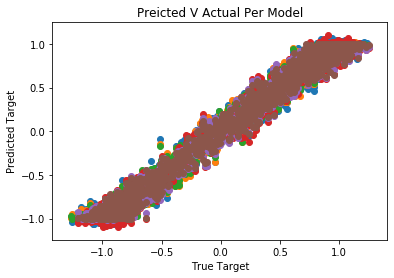

In [26]:
kf = KFold(2)
for p, (train_index, test_index) in zip(predictions, kf.split(X)):
    for m in p:
        plt.scatter(y[test_index], m)
plt.title("Preicted V Actual Per Model")
plt.xlabel("True Target")
plt.ylabel("Predicted Target")

Text(0.5, 1.0, 'Prediction by model by value of X')

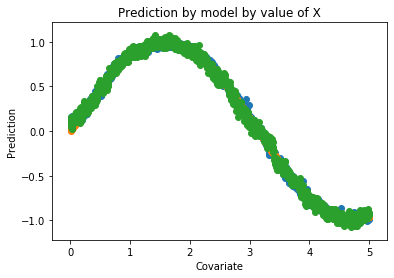

In [27]:
plt.scatter(X[:1500,0],predictions[0][1])
plt.scatter(X[:1500,0],predictions[0][2])
plt.scatter(X[:1500,0],predictions[0][0])
plt.ylabel("Prediction")
plt.xlabel("Covariate")
plt.title("Prediction by model by value of X")

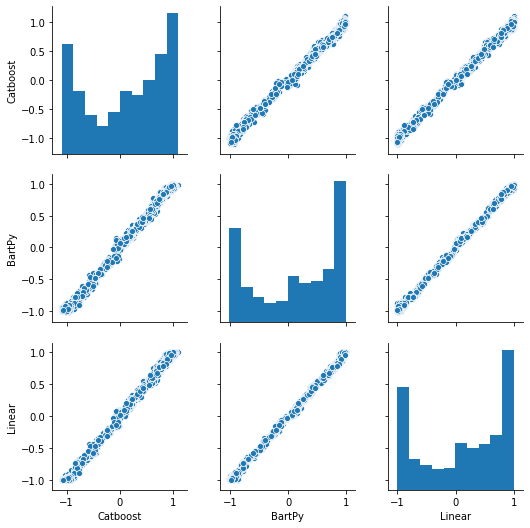

In [28]:
import seaborn as sns
p = pd.DataFrame(np.array(predictions[1]).T, columns = ["Catboost", "BartPy", "Linear"])
sns.pairplot(p)

## Mixture of multiple meaningful dimensions and noise dimensions

** Both catboost and BartPy have performed well with noise dimensions and rapidly moving targets, let's combine them to make a relatively difficult test for tree models **

Text(0.5, 1.0, 'X v y')

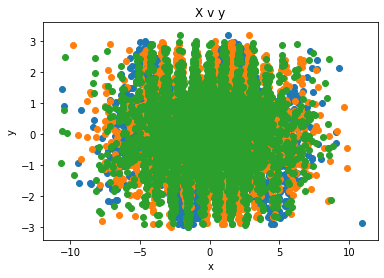

In [29]:
X = np.random.normal(0, 3, size = 3000 * 8).reshape(3000, 8)
X = pd.DataFrame(X).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0]) + np.sin(5 * X[:, 1]) + np.cos(-6 * X[:, 3])
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 3], y)

plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")


In [30]:
scores, predictions, trained_models = compare_models(X, y, [fit_bartpy])

In [31]:
scores

[[0.6017515849849886], [0.5776497871951538]]

In [32]:
scores

[[0.6017515849849886], [0.5776497871951538]]

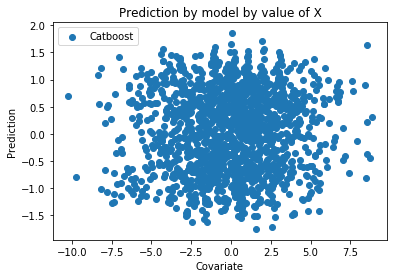

In [33]:
#plt.scatter(X[:1500,3],predictions[0][1], label = "Bart")
#plt.scatter(X[:1500,3],predictions[0][2], label = "Ols")
plt.scatter(X[:1500,3],predictions[0][0], label = "Catboost")
plt.ylabel("Prediction")
plt.xlabel("Covariate")
plt.title("Prediction by model by value of X")
plt.legend(loc = "best")

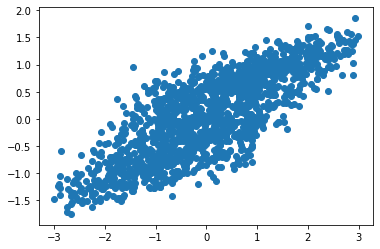

In [34]:
plt.scatter(y[:1500],predictions[0][0], label = "Catboost")
#plt.scatter(y[:1500],predictions[0][1], label = "Catboost")
#plt.scatter(y[:1500],predictions[0][2], label = "Catboost")

In [35]:
import seaborn as sns
p = pd.DataFrame(np.array(predictions[1]).T, columns = ["Catboost", "BartPy", "Linear"])
sns.pairplot(p)

ValueError: Shape of passed values is (1500, 1), indices imply (1500, 3)